# College project analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

## Read Data from File

In [ ]:
data=pd.read_csv('college.csv')

In [ ]:
data.head()

,College.Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
data.tail()

,College.Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99
776,York College of Pennsylvania,Yes,2989,1855,691,28,63,2988,1726,4990,3560,500,1250,75,75,18.1,28,4509,99


In [ ]:
data.shape

(777, 19)

## Understand the problem
#### The main goal of this project is to predict the number of applications received based on other available features, which includes the number of applications for admission to US colleges in 1995.

#### The output of such a study can be said to achieve a relationship between various parameters and affect the acceptance of the university.

#### Usually, people who work in the field of scientific research in the fields of academia and data science, as well as universities, turn to this type of research to identify students and the relationship between their admission and their scientific knowledge.


##  Data Inspection

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   College.Name  777 non-null    object 
 1   Private       777 non-null    object 
 2   Apps          777 non-null    int64  
 3   Accept        777 non-null    int64  
 4   Enroll        777 non-null    int64  
 5   Top10perc     777 non-null    int64  
 6   Top25perc     777 non-null    int64  
 7   F.Undergrad   777 non-null    int64  
 8   P.Undergrad   777 non-null    int64  
 9   Outstate      777 non-null    int64  
 10  Room.Board    777 non-null    int64  
 11  Books         777 non-null    int64  
 12  Personal      777 non-null    int64  
 13  PhD           777 non-null    int64  
 14  Terminal      777 non-null    int64  
 15  S.F.Ratio     777 non-null    float64
 16  perc.alumni   777 non-null    int64  
 17  Expend        777 non-null    int64  
 18  Grad.Rate     777 non-null    

### 1) This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the ASA Statistical Graphics Section's 1995 Data Analysis Exposition.

### 2) Varibles
#### College.Name : Name of The University
#### Private : A factor with levels No and Yes indicating private or public university
#### Apps : Number of applications received
#### Accept : Number of applications accepted
#### Enroll : Number of new students enrolled
#### Top10perc : Pct. new students from top 10% of H.S. class
#### Top25perc : Pct. new students from top 25% of H.S. class
#### F.Undergrad : Number of fulltime undergraduates
#### P.Undergrad : Number of parttime undergraduates
#### Outstate : Out-of-state tuition
#### Room.Board : Room and board costs
#### Books : Estimated book costs
#### Personal : Estimated personal spending
#### PhD : Pct. of faculty with Ph.D.'s
#### Terminal : Pct. of faculty with terminal degree
#### S.F.Ratio : Student/faculty ratio
#### perc.alumni : Pct. alumni who donate
#### Expend : Instructional expenditure per student
#### Grad.Rate : Graduation rate

### 3) There is no ambiguity in the definition of data

### 4) There may be errors in estimating some variables, such as estimating personal costs('personal') and book costs.

### 5) The presence of variables such as entrance exam results, university tuition fees, university academic rank and university admission capacity could be influential.

In [ ]:
data.isna().sum()

College.Name    0
Private         0
Apps            0
Accept          0
Enroll          0
Top10perc       0
Top25perc       0
F.Undergrad     0
P.Undergrad     0
Outstate        0
Room.Board      0
Books           0
Personal        0
PhD             0
Terminal        0
S.F.Ratio       0
perc.alumni     0
Expend          0
Grad.Rate       0
dtype: int64

In [ ]:
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


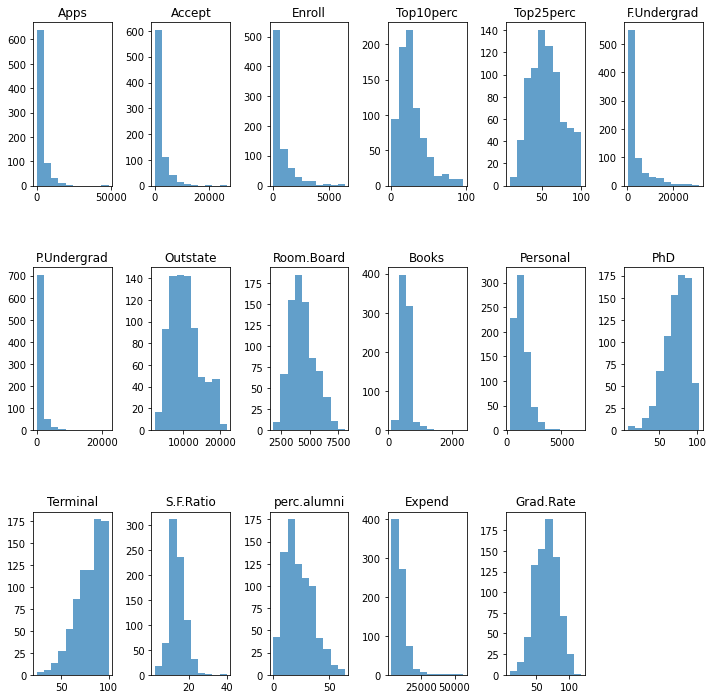

In [ ]:
#Continuous variables distribution
var_ind = list(range(2,19))
plot = plt.figure(figsize = (12, 12))
plot.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 18):
    a = plot.add_subplot(3, 6, i)
    a.hist(data.iloc[: , var_ind[i - 1]], alpha = 0.7)
    a.title.set_text(data.columns[var_ind[i - 1]])

Text(0.5, 1.0, 'Boxplot of Apps')

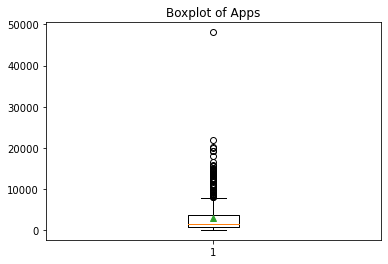

In [ ]:
#Box plot of Apps
plt.boxplot(data['Apps'], showmeans = True)
plt.title('Boxplot of Apps')

In [ ]:
#Correlation Analysis
corr_table = round(data.iloc[:, var_ind].corr(method = 'pearson'), 2)
corr_table

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.00,0.94,0.85,0.34,0.35,0.81,0.40,0.05,0.16,0.13,0.18,0.39,0.37,0.10,-0.09,0.26,0.15
Accept,0.94,1.00,0.91,0.19,0.25,0.87,0.44,-0.03,0.09,0.11,0.20,0.36,0.34,0.18,-0.16,0.12,0.07
Enroll,0.85,0.91,1.00,0.18,0.23,0.96,0.51,-0.16,-0.04,0.11,0.28,0.33,0.31,0.24,-0.18,0.06,-0.02
Top10perc,0.34,0.19,0.18,1.00,0.89,0.14,-0.11,0.56,0.37,0.12,-0.09,0.53,0.49,-0.38,0.46,0.66,0.49
Top25perc,0.35,0.25,0.23,0.89,1.00,0.20,-0.05,0.49,0.33,0.12,-0.08,0.55,0.52,-0.29,0.42,0.53,0.48
F.Undergrad,0.81,0.87,0.96,0.14,0.20,1.00,0.57,-0.22,-0.07,0.12,0.32,0.32,0.30,0.28,-0.23,0.02,-0.08
P.Undergrad,0.40,0.44,0.51,-0.11,-0.05,0.57,1.00,-0.25,-0.06,0.08,0.32,0.15,0.14,0.23,-0.28,-0.08,-0.26
Outstate,0.05,-0.03,-0.16,0.56,0.49,-0.22,-0.25,1.00,0.65,0.04,-0.30,0.38,0.41,-0.55,0.57,0.67,0.57
Room.Board,0.16,0.09,-0.04,0.37,0.33,-0.07,-0.06,0.65,1.00,0.13,-0.20,0.33,0.37,-0.36,0.27,0.50,0.42
Books,0.13,0.11,0.11,0.12,0.12,0.12,0.08,0.04,0.13,1.00,0.18,0.03,0.10,-0.03,-0.04,0.11,0.00


<AxesSubplot:>

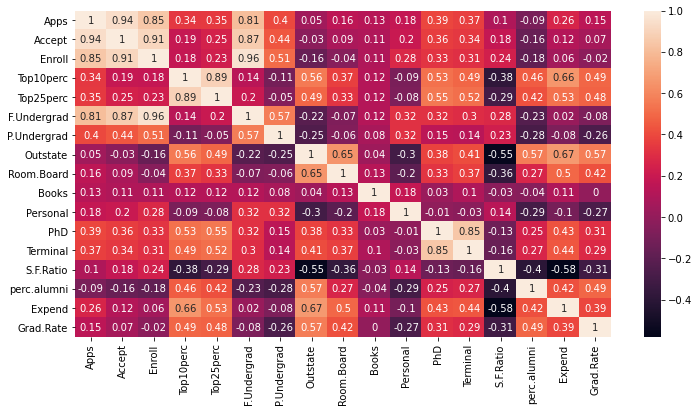

In [ ]:
plt.figure(figsize = (12, 6))
sns.heatmap(corr_table, annot = True)

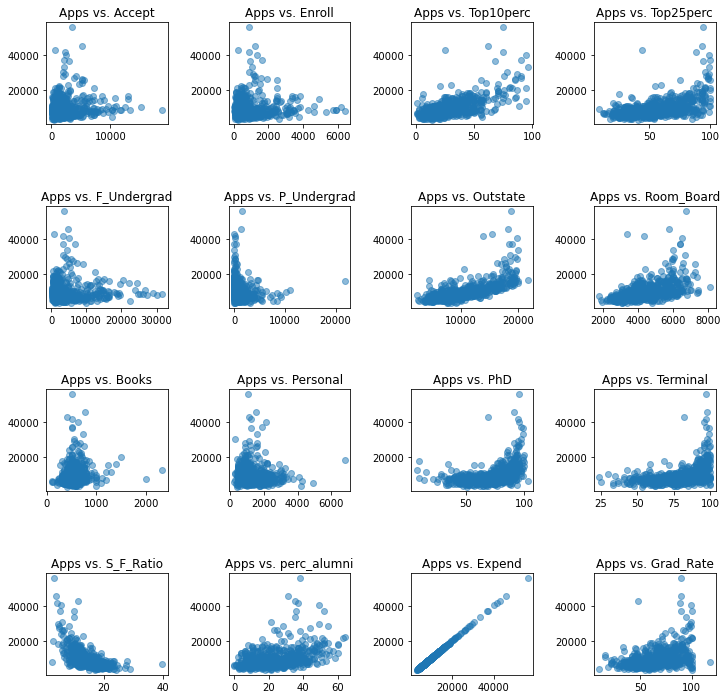

In [ ]:
#Scatter Plot
var_ind = list(range(3,19))
plot = plt.figure(figsize = (12, 12))
plot.subplots_adjust(hspace = 0.8, wspace = 0.5)
for i in range(1, 17):
    a = plot.add_subplot(4, 4, i)
    a.scatter(x = data.iloc[: , var_ind[i - 1]], y = data.iloc[: , 17], alpha = 0.5)
    a.title.set_text('Apps vs. ' + data.columns[var_ind[i - 1]])

In [ ]:
#Categorical variables
data['Private'].value_counts()

Yes    565
No     212
Name: Private, dtype: int64

## Data Preparation

### Divide Dataset into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.3, random_state = 5432)

In [ ]:
train.shape

(543, 19)

In [ ]:
train.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,3068.475138,2034.357274,769.766114,27.850829,56.202578,3696.434622,916.699816,10427.173112,4395.548803,560.766114,1340.977901,72.976059,80.009208,14.248987,22.626151,9589.983425,65.156538
std,4073.906171,2520.645389,898.571514,17.519358,19.594492,4864.825500,1723.761654,4016.348109,1103.601124,175.376628,711.194115,16.015484,14.484306,3.982753,12.565042,4950.112914,17.300881
min,81.000000,72.000000,51.000000,1.000000,12.000000,139.000000,1.000000,2340.000000,1880.000000,110.000000,250.000000,8.000000,24.000000,3.300000,0.000000,3365.000000,10.000000
25%,792.500000,616.500000,248.500000,16.000000,42.000000,973.500000,84.500000,7348.000000,3618.000000,490.000000,850.000000,63.000000,71.000000,11.550000,13.000000,6788.500000,53.000000
50%,1566.000000,1096.000000,434.000000,23.000000,54.000000,1707.000000,338.000000,10100.000000,4218.000000,530.000000,1200.000000,75.000000,82.000000,13.700000,20.000000,8471.000000,65.000000
75%,3739.500000,2421.000000,896.500000,35.000000,69.000000,4055.500000,987.500000,12937.500000,5105.000000,600.000000,1700.000000,86.000000,92.000000,16.500000,31.000000,10847.000000,77.000000
max,48094.000000,26330.000000,6392.000000,95.000000,100.000000,31643.000000,21836.000000,19964.000000,8124.000000,2340.000000,6800.000000,100.000000,100.000000,39.800000,64.000000,56233.000000,118.000000


In [ ]:
test.shape

(234, 19)

In [ ]:
test.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.00000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,2846.542735,1982.713675,803.658120,26.880342,54.854701,3707.965812,712.816239,10471.987179,4269.294872,522.961538,1339.863248,71.92735,78.991453,13.720085,23.017094,9823.042735,66.175214
std,3353.182149,2286.422477,998.192694,17.937499,20.295569,4827.205670,882.204260,4046.902462,1077.672187,135.050502,591.775424,17.04422,15.268412,3.884411,12.002134,5811.504245,16.903642
min,100.000000,90.000000,35.000000,1.000000,9.000000,199.000000,1.000000,2700.000000,1780.000000,96.000000,400.000000,10.00000,35.000000,2.500000,0.000000,3186.000000,21.000000
25%,715.500000,597.250000,231.500000,14.000000,39.250000,1001.000000,113.750000,7251.000000,3488.750000,450.000000,886.500000,61.25000,68.250000,11.300000,14.000000,6730.500000,54.000000
50%,1557.500000,1234.500000,436.000000,23.000000,53.000000,1744.000000,409.500000,9806.500000,4100.000000,500.000000,1257.000000,75.00000,82.000000,13.200000,22.500000,8189.000000,65.500000
75%,3416.750000,2403.500000,906.750000,35.750000,69.000000,3940.500000,907.750000,12878.500000,4847.500000,600.000000,1683.500000,84.75000,91.000000,16.300000,30.000000,10637.000000,79.000000
max,19152.000000,15096.000000,6180.000000,96.000000,100.000000,30017.000000,5189.000000,21700.000000,7350.000000,1300.000000,3300.000000,103.00000,100.000000,27.200000,60.000000,45702.000000,100.000000


In [ ]:
train = sm.add_constant(train)

In [ ]:
train.shape

(543, 20)

In [ ]:
train.head()

,const,College.Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
488,1.0,Saint Anselm College,Yes,2095,1553,514,15,40,1873,94,12950,5400,450,1120,70,82,14.5,29,6719,97
173,1.0,Drury College,Yes,700,650,314,33,66,1065,48,8730,3523,500,750,82,92,13.2,35,9303,67
160,1.0,Defiance College,Yes,571,461,174,10,26,645,283,10850,3670,400,1159,58,60,12.8,19,7505,56
90,1.0,Carthage College,Yes,1616,1427,434,20,43,1405,580,13125,3775,500,1300,74,89,15.9,22,7364,62
674,1.0,University of South Carolina at Aiken,No,848,560,377,14,24,1855,1412,5800,3066,500,1500,62,62,14.8,3,5035,48


## Building Prediction Model

### Model 1: Linear Regression

In [ ]:
import statsmodels.formula.api as smf

m1 = smf.ols(formula = 'Apps ~ const+Accept+C(Private)+ Enroll+Outstate+Books+Personal+PhD+Terminal+S_F_Ratio+F_Undergrad+perc_alumni+Grad_Rate+Room.Board + Expend+Top10perc+Top25perc+P.Undergrad', data = train).fit()
m1.summary()

In [ ]:
#Removing variables: perc_alumni,Personal,Books,PhD,S_F_Ratio, and Terminal
m2 = smf.ols(formula = 'Apps ~ const+Accept+C(Private)+ Enroll+Outstate+Grad_Rate+Room_Board +P_Undergrad+F_Undergrad +Expend+Top10perc+Top25perc',
             data = train).fit()
m2.summary()

<AxesSubplot:ylabel='Probability'>

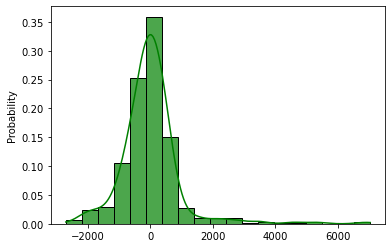

In [ ]:
#Check Assumptions of Regression
#Normality of residuals
#Plot histogram of residuals
sns.histplot(m2.resid, stat = 'probability',
             kde = True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(m2.resid), max(m2.resid), 20))

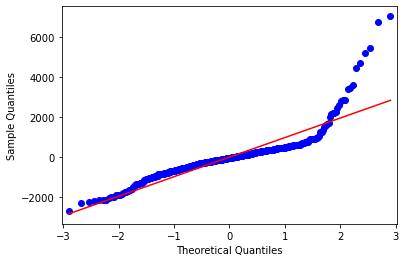

In [ ]:
#QQ-plot
qqplot_m2 = sm.qqplot(m2.resid, line = 's')
plt.show()

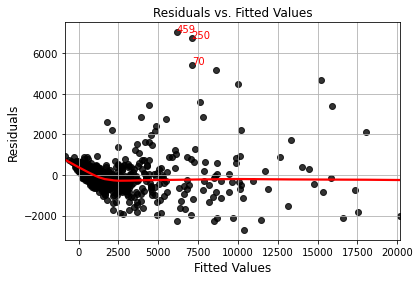

In [ ]:
#Residuals vs. Fitted Values
sns.regplot(x = m2.fittedvalues, y = m2.resid, lowess = True,
                       scatter_kws = {"color": "black"}, line_kws = {"color": "red"})
plt.xlabel('Fitted Values', fontsize = 12)
plt.ylabel('Residuals', fontsize = 12)
plt.title('Residuals vs. Fitted Values', fontsize = 12)
plt.grid()

#Top three observations with greates absolute value of the residual
top3 = abs(m2.resid).sort_values(ascending = False)[:3]
for i in top3.index:
    plt.annotate(i, xy = (m2.fittedvalues[i], m2.resid[i]), color = 'red')

In [ ]:
#Remove Cases(be cautious!)
#observations with greates residual
m2.resid.sort_values(ascending = False)[:5]

459    7044.007561
250    6775.653959
70     5444.427252
174    5187.291287
605    4685.423625
dtype: float64

In [ ]:
m2.resid.sort_values(ascending = True)[:5]

728   -2710.182414
91    -2291.664466
647   -2249.515377
365   -2215.144335
634   -2146.229592
dtype: float64

In [ ]:
#Remove Cases(be cautious!)
train2 = train.drop(index = [250, 174, 70,459,605]).copy()

In [ ]:
train.loc[train.index == 250,:]

,const,College.Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
250,1.0,Harvard University,Yes,13865,2165,1606,90,100,6862,320,18485,6410,500,1920,97,97,9.9,52,37219,100


In [ ]:
#Regression Model
m3 = smf.ols(formula ='Apps ~ const+Accept+C(Private)+ Enroll+Outstate+Grad_Rate+Room_Board +P_Undergrad+F_Undergrad +Expend+Top10perc+Top25perc',
               data = train2).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Apps   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     867.3
Date:                Tue, 31 May 2022   Prob (F-statistic):               0.00
Time:                        18:16:08   Log-Likelihood:                -4323.3
No. Observations:                 538   AIC:                             8671.
Df Residuals:                     526   BIC:                             8722.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -417.8264    103.913     -4.021      0.000    -621.962    -213.691
C(Private)[T.Yes]  -320.2571    112.580     -2.845      0.005    -541.419     -99.096
const              -417.8264    103.913     -4.021      0.000    -621.962    -213.691
Accept                1.4244      0.044     32.370      0.000       1.338       1.511
Enroll               -0.7304      0.163     -4.493      0.000      -1.050      -0.411
Outstate             -0.0561      0.016     -3.490      0.001      -0.088      -0.025
Grad_Rate             6.0106      2.514      2.391      0.017       1.072      10.949
Room_Board            0.1389      0.042      3.326      0.001       0.057       0.221
P_Undergrad           0.0589      0.026      2.309      0.021       0.009       0.109
F_Undergrad           0.0945      0.027      3.460      0.001       0.041       0.148
Expend                0.0396      0.011      3.581      0.000       0.018       0.061
Top10perc            24.9539      5.134      4.860      0.000      14.867      35.040
Top25perc            -3.6691      3.917     -0.937      0.349     -11.364       4.025
==============================================================================
Omnibus:                      259.861   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2450.910
Skew:                           1.891   Prob(JB):                         0.00
Kurtosis:                      12.748   Cond. No.                     8.37e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.99e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<AxesSubplot:ylabel='Probability'>

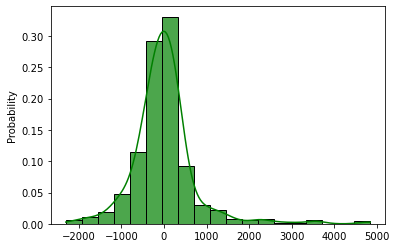

In [ ]:
#Check Assumptions of Regression
#Normality of residuals
#Plot histogram of residuals
sns.histplot(m3.resid, stat = 'probability',
             kde = True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(m3.resid), max(m3.resid), 20))

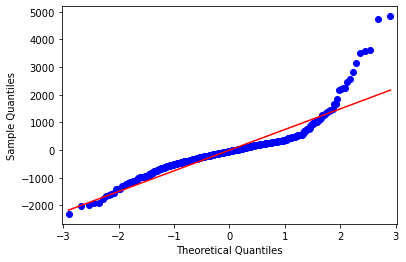

In [ ]:
#QQ-plot
qqplot_m3 = sm.qqplot(m3.resid, line = 's')
plt.show()

In [ ]:
#Check Cook's Distance
sum(m3.get_influence().summary_frame().cooks_d > 1)

0

In [ ]:
#Number of removed observation < 1%
(train.shape[0] - train2.shape[0]) / train.shape[0] * 100

0.9208103130755065

#### Model 1: Prediction on Test dataset

In [ ]:
test.head()

,College.Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
582,Texas A&M University at Galveston,No,529,481,243,22,47,1206,134,4860,3122,600,650,103,88,17.4,16,6415,43
225,Gettysburg College,Yes,3596,2466,575,42,78,1944,46,19964,4328,500,500,94,95,12.1,32,14720,83
527,Skidmore College,Yes,4293,2728,591,25,62,2322,263,18710,5970,500,700,87,92,12.7,29,14837,81
761,William Jewell College,Yes,663,547,315,32,67,1279,75,10060,2970,500,2600,74,80,11.2,19,7885,59
396,Mount Saint Mary College,Yes,1170,695,238,14,48,1170,429,7470,4600,250,1400,74,75,15.3,23,6898,88


In [ ]:
#Coefficients of the Model
m3.params

Intercept           -417.826357
C(Private)[T.Yes]   -320.257102
const               -417.826357
Accept                 1.424368
Enroll                -0.730433
Outstate              -0.056137
Grad_Rate              6.010571
Room_Board             0.138910
P_Undergrad            0.058920
F_Undergrad            0.094505
Expend                 0.039552
Top10perc             24.953860
Top25perc             -3.669136
dtype: float64

In [ ]:
#Confidence Intervals for Model Parameters
m3.conf_int(alpha = 0.05)

,0,1
Intercept,-621.962128,-213.690586
C(Private)[T.Yes],-541.418661,-99.095543
const,-621.962128,-213.690586
Accept,1.337925,1.510810
Enroll,-1.049798,-0.411068
Outstate,-0.087734,-0.024540
Grad_Rate,1.071818,10.949324
Room_Board,0.056861,0.220959
P_Undergrad,0.008783,0.109057
F_Undergrad,0.040851,0.148159


In [ ]:
test = sm.add_constant(test)

In [ ]:
test.head()

,const,College.Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
582,1.0,Texas A&M University at Galveston,No,529,481,243,22,47,1206,134,4860,3122,600,650,103,88,17.4,16,6415,43
225,1.0,Gettysburg College,Yes,3596,2466,575,42,78,1944,46,19964,4328,500,500,94,95,12.1,32,14720,83
527,1.0,Skidmore College,Yes,4293,2728,591,25,62,2322,263,18710,5970,500,700,87,92,12.7,29,14837,81
761,1.0,William Jewell College,Yes,663,547,315,32,67,1279,75,10060,2970,500,2600,74,80,11.2,19,7885,59
396,1.0,Mount Saint Mary College,Yes,1170,695,238,14,48,1170,429,7470,4600,250,1400,74,75,15.3,23,6898,88


In [ ]:
#Prediction
test_pred = m3.predict(test)
test_pred

582      843.407578
225     3446.446364
527     3782.034784
761      585.430973
396      990.667922
638     3805.167146
29      2295.853420
149     2555.167741
403      653.366354
486     2688.458563
211      578.384161
749     1096.362072
75       591.078240
699     2566.969833
631      357.395231
276     4923.315423
18       621.707102
145      -73.728206
609     5934.383343
26      2424.796260
650     1693.175237
38      1300.276281
257     8226.247430
163     2828.238131
760     2181.004024
479     3624.371568
140     2694.433814
547     2656.981131
674      794.370762
318     1997.610857
86      3167.713313
262      686.689248
508     3566.136218
669     8818.085795
282      637.384920
467     1590.832860
271      378.016747
731     -125.465681
10      2049.730242
221     5253.456249
162     3138.671488
54      1684.319075
258      906.575256
317      406.010412
214     2425.901970
767     2641.697547
428     4322.181595
733     3257.567136
234      177.592751
751     1633.881208


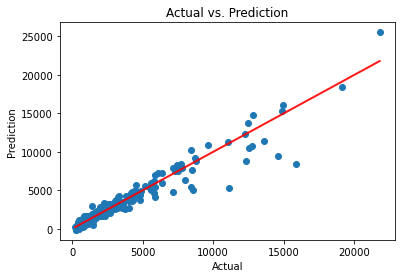

In [ ]:
#Actual vs. Prediction
plt.scatter(x = test['Apps'], y = test_pred)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(test['Apps'].min(), test['Apps'].max(), 100)
plt.plot(xp, xp, 'k', alpha = 0.9, linewidth = 2, color = 'red')

In [ ]:
abs_error = abs(test['Apps'] - test_pred)
abs_error.describe()

count     233.000000
mean      537.817124
std       871.439060
min         2.040577
25%       135.791676
50%       317.033665
75%       523.004024
max      7451.405327
dtype: float64

<AxesSubplot:>

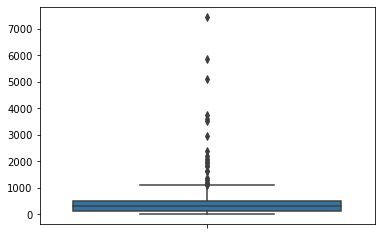

In [ ]:
sns.boxplot(y = abs_error)

In [ ]:
e_percent = round(abs(test['Apps'] - test_pred) / test['Apps'] * 100, 2)
e_percent.describe()

count    233.000000
mean      24.829828
std       27.107371
min        0.170000
25%        8.120000
50%       16.280000
75%       30.940000
max      161.570000
dtype: float64

In [ ]:
from scipy.stats import iqr
model_comp = pd.DataFrame({'Mean of AbsErrors':    abs_error.mean(),
                           'Median of AbsErrors' : abs_error.median(),
                           'SD of AbsErrors' :     abs_error.std(),
                           'IQR of AbsErrors':     iqr(abs_error),
                           'Min of AbsErrors':     abs_error.min(),
                           'Max of AbsErrors':     abs_error.max()}, index = ['LM_t-test'])
model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,537.817124,317.033665,871.43906,387.212348,2.040577,7451.405327


### Box-Cox Transformation

In [ ]:
#Create dummies for columns with categorical variables
dummies = pd.get_dummies(train2[['Private']])
dummies.head()

,Private_No,Private_Yes
374,0,1
626,1,0
510,1,0
12,0,1
595,0,1


In [ ]:
#Define the feature set X
X_ = train2.drop(['Apps', 'College.Name', 'Private'], axis = 1)
X_train = pd.concat([X_, dummies[['Private_Yes']]], axis = 1)
#Define response variable
y_train = train2['Apps']

In [ ]:
X_train.head()

,const,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate,Private_Yes
374,1.0,385,307,36,57,1695,721,5580,2830,600,700,77,79,16.5,18,6170,61,1
626,1.0,5561,3681,25,50,17880,1673,6994,3384,700,2681,88,94,13.7,17,9657,57,0
510,1.0,7020,2151,20,70,16407,5550,8384,5110,612,2400,87,93,19.5,7,7930,41,0
12,1.0,780,290,38,64,1130,638,9690,4785,600,1000,60,84,13.3,21,7940,74,1
595,1.0,185,91,16,41,484,541,11010,5208,550,500,58,78,10.4,26,9586,78,1


In [ ]:
#Box-Cox Transformation
from scipy.stats import boxcox
box_results = boxcox(y_train, alpha = 0.05)

In [ ]:
box_results

(array([5.40701588, 7.17253795, 7.22873097, 5.88471464, 4.68972498,
        6.36644231, 6.0347285 , 7.3965506 , 6.67355842, 6.02312732,
        6.25982592, 6.84759689, 6.61687951, 5.66462677, 6.84585672,
        5.34446262, 5.97753111, 6.72266726, 5.404622  , 5.38515857,
        5.35872997, 5.72879683, 4.61890566, 6.80062947, 7.02469199,
        6.14084882, 5.92137291, 6.95470307, 6.52030268, 5.44420323,
        6.31184073, 5.71163189, 5.90132645, 5.52304048, 6.81991076,
        6.99199763, 6.57458718, 5.87004481, 5.56207512, 6.85303338,
        6.36316582, 6.15889659, 4.65519561, 5.19720063, 6.80610672,
        5.74264604, 7.53813082, 5.58535867, 6.62212408, 5.2798729 ,
        6.52916543, 6.84098233, 6.83518172, 5.76811119, 6.26943532,
        6.80610672, 6.45749147, 6.70059103, 6.35128196, 5.48371639,
        6.31863806, 5.15352208, 6.50087122, 6.91313519, 6.11257597,
        5.83216836, 5.71389637, 5.90189175, 4.95604147, 5.70631762,
        5.7729499 , 5.65481011, 6.00218606, 6.65

In [ ]:
logy_train = np.log(y_train)
logy_train

374    6.386879
626    9.057073
510    9.148678
12     7.072422
595    5.402677
185    7.790282
307    7.293018
663    9.424968
91     8.262817
689    7.275865
681    7.629004
691    8.536015
709    8.174703
361    6.753438
621    8.533263
300    6.298949
646    7.208600
64     8.339501
586    6.383507
617    6.356108
232    6.318968
442    6.845880
51     5.308268
343    8.461892
144    8.818186
248    7.450661
540    7.126087
417    8.706159
593    8.025516
598    6.439350
401    7.707512
750    6.821107
629    7.096721
173    6.551080
568    8.492286
354    8.765771
766    8.109225
588    7.050989
335    6.606650
460    8.544614
457    7.785305
557    7.477604
108    5.356586
62     6.093570
737    8.470521
107    6.865891
606    9.661289
190    6.639876
329    8.182839
302    6.208590
747    8.039157
591    8.525558
471    8.516393
154    6.902743
81     7.643483
125    8.470521
655    7.929126
666    8.304990
74     7.767264
28     6.495266
502    7.717796
3      6.033086
415    7

<AxesSubplot:xlabel='Apps', ylabel='Probability'>

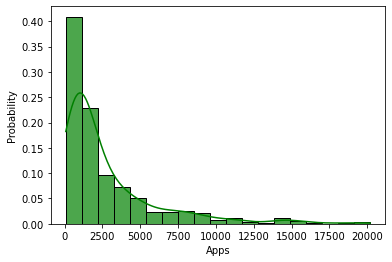

In [ ]:
#Histogram of Apps
sns.histplot(y_train, stat = 'probability',
             kde = True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(y_train), max(y_train), 20))

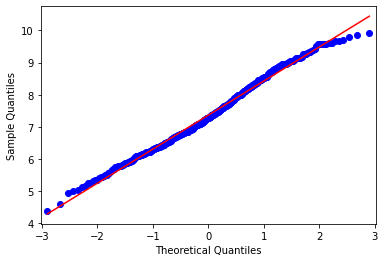

In [ ]:
#QQ-plot
qqplot_lm_bc = sm.qqplot(logy_train, line = 's')
plt.show()

## Model 2: Ridge Regression

In [ ]:
lambda_grid = 10 ** np.linspace(5, -2, 100)
lambda_grid

array([1.00000000e+05, 8.49753436e+04, 7.22080902e+04, 6.13590727e+04,
       5.21400829e+04, 4.43062146e+04, 3.76493581e+04, 3.19926714e+04,
       2.71858824e+04, 2.31012970e+04, 1.96304065e+04, 1.66810054e+04,
       1.41747416e+04, 1.20450354e+04, 1.02353102e+04, 8.69749003e+03,
       7.39072203e+03, 6.28029144e+03, 5.33669923e+03, 4.53487851e+03,
       3.85352859e+03, 3.27454916e+03, 2.78255940e+03, 2.36448941e+03,
       2.00923300e+03, 1.70735265e+03, 1.45082878e+03, 1.23284674e+03,
       1.04761575e+03, 8.90215085e+02, 7.56463328e+02, 6.42807312e+02,
       5.46227722e+02, 4.64158883e+02, 3.94420606e+02, 3.35160265e+02,
       2.84803587e+02, 2.42012826e+02, 2.05651231e+02, 1.74752840e+02,
       1.48496826e+02, 1.26185688e+02, 1.07226722e+02, 9.11162756e+01,
       7.74263683e+01, 6.57933225e+01, 5.59081018e+01, 4.75081016e+01,
       4.03701726e+01, 3.43046929e+01, 2.91505306e+01, 2.47707636e+01,
       2.10490414e+01, 1.78864953e+01, 1.51991108e+01, 1.29154967e+01,
      

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV
ridgereg = Ridge(normalize = True)

models = pd.DataFrame(index = lambda_grid, columns = X_train.columns)
coefs = []
for i in lambda_grid:
    ridgereg.set_params(alpha = i)
    ridgereg.fit(X_train, logy_train)
    models.loc[i, :] = ridgereg.coef_
models.shape

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skl

(100, 18)

In [ ]:
models.head()

,const,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate,Private_Yes
100000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000001,-0.0,0.0,0.0,-0.000012
84975.343591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000001,-0.0,0.0,0.0,-0.000014
72208.090184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000001,-0.0,0.0,0.0,-0.000017
61359.072734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000001,0.000001,0.000001,-0.0,0.0,0.0,-0.00002
52140.082880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000001,0.000001,0.000001,-0.0,0.0,0.0,-0.000023


In [ ]:
models.tail()

,const,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate,Private_Yes
0.019179,0.0,0.000232,0.000154,0.003651,0.001651,-0.000015,0.000034,0.000026,0.000045,0.000359,0.00003,0.0074,0.000247,0.041609,-0.005219,0.000018,0.009413,-0.527727
0.016298,0.0,0.000236,0.000154,0.003708,0.001617,-0.000017,0.000035,0.000026,0.000044,0.000361,0.000031,0.007427,0.000184,0.041788,-0.005186,0.000018,0.009408,-0.530499
0.013849,0.0,0.000239,0.000153,0.003761,0.001587,-0.000018,0.000035,0.000026,0.000044,0.000362,0.000031,0.007449,0.000131,0.041943,-0.005156,0.000018,0.009402,-0.532895
0.011768,0.0,0.000242,0.000152,0.003809,0.00156,-0.00002,0.000035,0.000026,0.000044,0.000363,0.000031,0.007468,0.000085,0.042076,-0.005128,0.000018,0.009395,-0.534963
0.010000,0.0,0.000244,0.000152,0.003853,0.001536,-0.000021,0.000036,0.000026,0.000043,0.000364,0.000032,0.007484,0.000047,0.042191,-0.005103,0.000018,0.009389,-0.536743


Text(0, 0.5, 'weights')

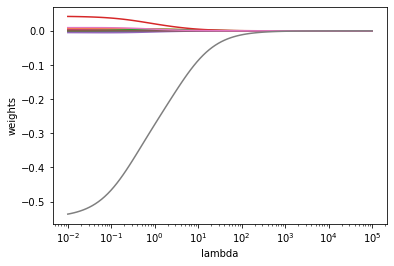

In [ ]:
#Plot the Results
plot_ridge = plt.gca()
plot_ridge.plot(lambda_grid, models)
plot_ridge.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('weights')

In [ ]:
#K-fold Cross Validation to Choose the Best Model
ridgecv = RidgeCV(alphas = lambda_grid, cv = 10, normalize = True)
ridgecv.fit(X_train, logy_train)
ridgecv.alpha_

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skl

0.022570197196339216

## Model 2: Prediction on Test Dataset

In [ ]:
ridgecv.coef_

array([ 0.00000000e+00,  2.27802929e-04,  1.55412415e-04,  3.58993862e-03,
        1.68653636e-03, -1.31367005e-05,  3.37517133e-05,  2.59686452e-05,
        4.55743696e-05,  3.57532272e-04,  2.97983192e-05,  7.36916533e-03,
        3.19820379e-04,  4.14025094e-02, -5.25364707e-03,  1.77786291e-05,
        9.41501130e-03, -5.24529377e-01])

In [ ]:
test.head()

,const,College.Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
582,1.0,Texas A&M University at Galveston,No,529,481,243,22,47,1206,134,4860,3122,600,650,103,88,17.4,16,6415,43
225,1.0,Gettysburg College,Yes,3596,2466,575,42,78,1944,46,19964,4328,500,500,94,95,12.1,32,14720,83
527,1.0,Skidmore College,Yes,4293,2728,591,25,62,2322,263,18710,5970,500,700,87,92,12.7,29,14837,81
761,1.0,William Jewell College,Yes,663,547,315,32,67,1279,75,10060,2970,500,2600,74,80,11.2,19,7885,59
396,1.0,Mount Saint Mary College,Yes,1170,695,238,14,48,1170,429,7470,4600,250,1400,74,75,15.3,23,6898,88


In [ ]:
dummies = pd.get_dummies(test[['Private']])
dummies.head()


,Private_No,Private_Yes
582,1,0
225,0,1
527,0,1
761,0,1
396,0,1


In [ ]:
#Define the feature set X
X_ = test.drop(['Apps', 'College.Name', 'Private'], axis = 1)
X_test = pd.concat([X_, dummies[['Private_Yes']]], axis = 1)

#Define response variable
y_test = test['Apps']

In [ ]:
X_test.head()

,const,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate,Private_Yes
582,1.0,481,243,22,47,1206,134,4860,3122,600,650,103,88,17.4,16,6415,43,0
225,1.0,2466,575,42,78,1944,46,19964,4328,500,500,94,95,12.1,32,14720,83,1
527,1.0,2728,591,25,62,2322,263,18710,5970,500,700,87,92,12.7,29,14837,81,1
761,1.0,547,315,32,67,1279,75,10060,2970,500,2600,74,80,11.2,19,7885,59,1
396,1.0,695,238,14,48,1170,429,7470,4600,250,1400,74,75,15.3,23,6898,88,1


In [ ]:
ridgereg = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridgereg.fit(X_train, logy_train)
pred_ridge = ridgereg.predict(X_test)
pred_ridge = np.exp(pred_ridge)
pred_ridge

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


array([  1423.74733069,   2739.05174916,   2728.26169192,    786.77301424,
          983.30130181,   3918.85243171,   1309.68494744,   2278.6860513 ,
         1085.47152185,   1619.21388404,    806.7088816 ,    881.26762638,
          768.53274303,   2472.86633025,    909.36555676,   2288.74143714,
          688.97123652,    553.0869981 ,   4801.03928969,   1812.73081965,
         1275.17426095,   1256.57925315,   5162.23373201,   1710.94355758,
         1490.12787456,   1524.6840342 ,   1803.79787539,   2241.22156008,
         1044.3422019 ,   1895.76398225,   2095.47630033,    583.28377302,
         2269.45499589,   6270.65475601,    765.86079075,   1008.48840113,
          636.51680284,    750.97692588,   1519.64584402,   4483.53362243,
         1899.54735559,   1126.47379153,    963.02618203,   2036.12645916,
         1069.94054404,   1684.52372206,   2680.13186382,   2641.52026964,
          811.68809576,   2755.55742314,   1271.0469223 ,    661.73560996,
          841.14650867,  

In [ ]:
abs_err_ridge = abs(y_test - pred_ridge)

In [ ]:
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_ridge.mean(),
                                             'Median of AbsErrors' : abs_err_ridge.median(),
                                             'SD of AbsErrors' :     abs_err_ridge.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_ridge),
                                             'Min of AbsErrors':     abs_err_ridge.min(),
                                             'Max of AbsErrors':     abs_err_ridge.max()}, index = ['Ridge Reg']),
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,537.817124,317.033665,871.439060,387.212348,2.040577,7451.405327
Ridge Reg,2537.451016,448.365557,16719.536998,981.719355,5.728062,243358.851230


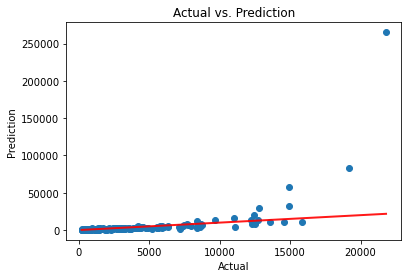

In [ ]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_ridge)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

## Model 3: Lasso Regression

In [ ]:
lambda_grid = 10 ** np.linspace(1, -3, 100)
lassoreg = Lasso(normalize = True)

In [ ]:
from sklearn.linear_model import Lasso, LassoCV
lassoreg =lassoreg = Lasso(normalize = True)
models = pd.DataFrame(index = lambda_grid, columns = X_train.columns)
coefs = []
for i in lambda_grid:
    lassoreg.set_params(alpha = i)
    lassoreg.fit(X_train, logy_train)
    models.loc[i, :] = lassoreg.coef_
models.shape

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:


(100, 18)

In [ ]:
models.tail(10)

,const,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate,Private_Yes
0.002310,0.0,0.000295,0.0,0.003957,0.000199,0.0,0.000003,0.0,0.000022,0.000163,0.0,0.008577,0.000035,0.014041,-0.0,0.000005,0.005141,-0.335719
0.002105,0.0,0.000293,0.0,0.003956,0.000266,0.0,0.000006,0.0,0.000026,0.000183,0.0,0.008526,0.0,0.016451,-0.0,0.000007,0.005508,-0.348824
0.001918,0.0,0.000291,0.0,0.003956,0.000327,0.0,0.000008,0.0,0.000029,0.000201,0.0,0.008455,0.0,0.018659,-0.0,0.000008,0.005844,-0.360675
0.001748,0.0,0.00029,0.0,0.003956,0.000383,0.0,0.00001,0.0,0.000032,0.000217,0.0,0.008391,0.0,0.020671,-0.0,0.00001,0.006149,-0.371472
0.001592,0.0,0.000288,0.0,0.003948,0.000426,0.0,0.000013,0.000001,0.000033,0.000233,0.0,0.008297,0.0,0.022563,-0.0,0.000011,0.006387,-0.385318
0.001451,0.0,0.000287,0.0,0.00394,0.00046,0.0,0.000015,0.000003,0.000034,0.000248,0.0,0.008197,0.0,0.024311,-0.0,0.000011,0.006588,-0.399658
0.001322,0.0,0.000286,0.0,0.003929,0.000492,0.0,0.000017,0.000005,0.000035,0.000262,0.0,0.008107,0.0,0.025903,-0.0,0.000012,0.006771,-0.41272
0.001205,0.0,0.000285,0.0,0.003923,0.000521,0.0,0.000018,0.000006,0.000036,0.000274,0.0,0.008024,0.0,0.027354,-0.0,0.000012,0.006938,-0.424624
0.001097,0.0,0.000283,0.0,0.003947,0.000562,0.0,0.00002,0.000008,0.000036,0.000284,0.0,0.007967,0.0,0.028642,-0.000311,0.000013,0.007134,-0.434603
0.001000,0.0,0.000282,0.0,0.003989,0.000603,0.0,0.000021,0.000009,0.000036,0.000293,0.0,0.007923,0.0,0.029802,-0.000718,0.000013,0.007331,-0.443329


Text(0, 0.5, 'weights')

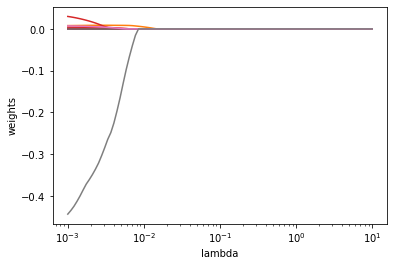

In [ ]:
#Plot Results
plot_lasso = plt.gca()
plot_lasso.plot(lambda_grid, models)
plot_lasso.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('weights')

In [ ]:
#K-fold Cross Validation to Choose the Best Model
lassocv = LassoCV(alphas = lambda_grid, cv = 10, normalize = True)
lassocv.fit(X_train, logy_train)
lassocv.alpha_

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


0.001

## Model 3: Prediction on Test Dataset

In [ ]:
lassocv.coef_

array([ 0.00000000e+00,  2.81888192e-04,  0.00000000e+00,  3.98882253e-03,
        6.02930537e-04,  0.00000000e+00,  2.13090510e-05,  9.18285594e-06,
        3.58792411e-05,  2.93205543e-04,  0.00000000e+00,  7.92288159e-03,
        0.00000000e+00,  2.98016764e-02, -7.18473943e-04,  1.34069083e-05,
        7.33087225e-03, -4.43329078e-01])

In [ ]:
lassoreg = Lasso(alpha = lassocv.alpha_, normalize = True)
lassoreg.fit(X_train, logy_train)
pred_lasso = lassoreg.predict(X_test)
pred_lasso = np.exp(pred_lasso)
pred_lasso

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


array([  1498.92504064,   2544.75867305,   2544.51294147,    789.78283571,
         1010.13596678,   3232.15201721,   1413.20207593,   2064.8241835 ,
          976.64855864,   1562.40192312,    826.41193784,    950.12611723,
          823.27614902,   2202.30482614,    906.6161573 ,   2313.40565187,
          737.92887946,    606.16929086,   4236.6471674 ,   1835.33312013,
         1313.62478896,   1136.73339506,   5498.21052088,   1682.14792053,
         1527.81394079,   1474.28623781,   1815.08487457,   2099.91620281,
         1011.00505621,   1786.75436362,   2111.58229331,    638.25360934,
         2319.31488004,   6397.9809756 ,    803.9947613 ,   1112.49311307,
          689.25451558,    716.42260489,   1469.93581675,   3692.13767182,
         2010.92045536,   1153.54921819,   1028.41574301,   1478.01488849,
         1071.68682966,   1728.87766055,   2590.54434912,   2436.7515309 ,
          855.49700826,   2157.71629231,   1092.49238184,    721.43825388,
          853.13742396,  

In [ ]:
abs_err_lasso = abs(y_test - pred_lasso)

In [ ]:
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_lasso.mean(),
                                             'Median of AbsErrors' : abs_err_lasso.median(),
                                             'SD of AbsErrors' :     abs_err_lasso.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_lasso),
                                             'Min of AbsErrors':     abs_err_lasso.min(),
                                             'Max of AbsErrors':     abs_err_lasso.max()}, index = ['Lasso Reg']),
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,537.817124,317.033665,871.439060,387.212348,2.040577,7451.405327
Ridge Reg,2537.451016,448.365557,16719.536998,981.719355,5.728062,243358.851230
Lasso Reg,2879.191449,443.375211,21461.190113,1005.924405,2.327060,319586.567504


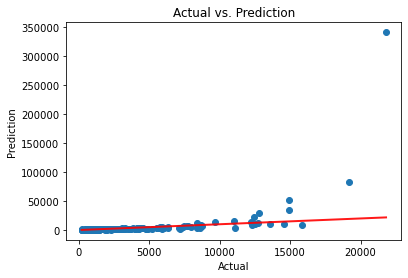

In [ ]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_lasso)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

## Model 4: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#Decision Tree Model Using All Variables
reg_tree = DecisionTreeRegressor(max_depth = 6, min_samples_leaf = 5, ccp_alpha = 0.001)
tree_res = reg_tree.fit(X_train.iloc[:, 1:], logy_train)

[Text(0.5, 0.9285714285714286, 'Accept <= 1094.5\nsquared_error = 1.124\nsamples = 538\nvalue = 7.367'),
 Text(0.25, 0.7857142857142857, 'Accept <= 464.5\nsquared_error = 0.347\nsamples = 277\nvalue = 6.537'),
 Text(0.125, 0.6428571428571429, 'Accept <= 246.0\nsquared_error = 0.176\nsamples = 100\nvalue = 5.921'),
 Text(0.0625, 0.5, 'Accept <= 152.0\nsquared_error = 0.15\nsamples = 26\nvalue = 5.373'),
 Text(0.03125, 0.35714285714285715, 'squared_error = 0.076\nsamples = 8\nvalue = 4.94'),
 Text(0.09375, 0.35714285714285715, 'squared_error = 0.063\nsamples = 18\nvalue = 5.565'),
 Text(0.1875, 0.5, 'Accept <= 353.5\nsquared_error = 0.043\nsamples = 74\nvalue = 6.113'),
 Text(0.15625, 0.35714285714285715, 'squared_error = 0.028\nsamples = 32\nvalue = 5.945'),
 Text(0.21875, 0.35714285714285715, 'squared_error = 0.016\nsamples = 42\nvalue = 6.241'),
 Text(0.375, 0.6428571428571429, 'Accept <= 766.5\nsquared_error = 0.108\nsamples = 177\nvalue = 6.885'),
 Text(0.3125, 0.5, 'Accept <= 594.5

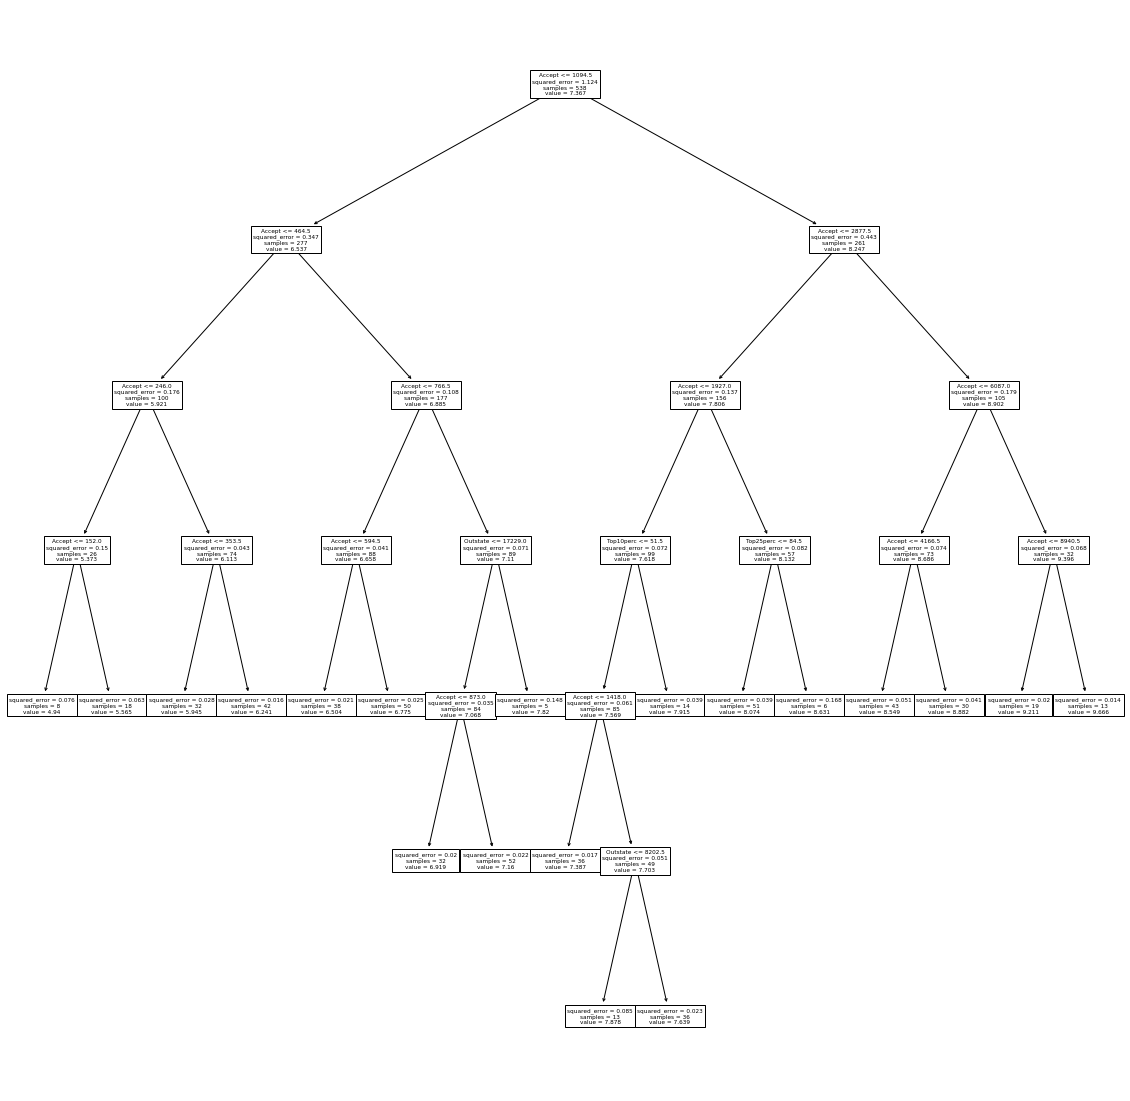

In [ ]:
#Plot the Tree
from sklearn.tree import plot_tree
fig = plt.figure(figsize = (20, 20))
plot_tree(tree_res, feature_names = X_train.iloc[:, 1:].columns)

In [ ]:
import itertools
#K-Fold Cross Validation for Choosing Hyper-parameters
#Create Hyper-parameters grid
max_depth = [3,5, 7, 10]
min_samples_leaf = [5, 10, 15]
ccp_alpha = [0.0001, 0.001, 0.01]
grid = list(itertools.product(max_depth, min_samples_leaf, ccp_alpha))
grid = pd.DataFrame(data = grid, index = range(1, 37), columns = ['max_depth', 'min_samples_leaf', 'ccp_alpha'])
grid

,max_depth,min_samples_leaf,ccp_alpha
1,3,5,0.0001
2,3,5,0.0010
3,3,5,0.0100
4,3,10,0.0001
5,3,10,0.0010
6,3,10,0.0100
7,3,15,0.0001
8,3,15,0.0010
9,3,15,0.0100
10,5,5,0.0001


In [ ]:
k = 10
cv_errors = pd.DataFrame(index = range(1, k + 1), columns = range(1, 37))
cv_errors

,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
k = 10
np.random.seed(9876)
folds = np.random.randint(low = 1, high = k + 1, size = X_train.shape[0])

In [ ]:
folds

array([ 7,  4,  8,  3,  9, 10,  6,  6,  2,  4,  7,  6,  6,  2,  1,  1,  8,
        8,  9,  5,  6,  7, 10,  9,  5,  7,  1,  6,  4,  8,  5,  1,  3,  3,
        1,  7,  5,  7,  9,  5,  5,  3,  7,  5, 10,  7,  6,  9, 10,  5,  1,
        3,  4,  7,  5,  5,  1,  9,  4,  6,  1,  9,  1,  1, 10,  1,  5,  2,
       10,  3,  5,  6,  6,  8,  4,  6, 10,  1,  9, 10,  9,  2,  9,  1,  6,
        9, 10,  9, 10,  4,  7, 10,  9,  4,  6,  1,  9,  3,  3,  2,  7,  4,
       10,  6,  9,  4,  8,  2,  4,  2,  3, 10,  9,  3,  3,  6,  3,  1,  3,
        8,  9,  6,  5,  6,  1,  8,  2,  9,  4,  8,  4,  7,  9,  3, 10,  6,
        5,  7,  1,  6,  8,  6,  3,  4,  1,  4,  8, 10,  9,  4, 10,  4,  2,
        9,  3, 10,  5,  6,  1,  2,  4,  6,  5,  7,  8,  5, 10,  8,  7,  9,
       10,  3,  3,  6,  9,  1,  7,  7,  5,  8,  5,  7,  6, 10,  1, 10,  7,
        8, 10,  5,  5,  2, 10,  7,  3, 10,  2,  9,  5,  8,  6,  3,  8,  6,
        7,  8,  3,  7,  4,  4,  9,  6,  9,  4,  4,  2, 10,  8,  6,  1,  5,
       10, 10,  2, 10,  9

In [ ]:
for i in range(1, grid.shape[0] + 1):
    for j in range(1, k + 1):
        reg_tree = DecisionTreeRegressor(max_depth = grid.loc[i, 'max_depth'],
                                         min_samples_leaf = grid.loc[i, 'min_samples_leaf'],
                                         ccp_alpha = grid.loc[i, 'ccp_alpha'])
        tree_res = reg_tree.fit(X_train.iloc[folds != j, 1:], logy_train[folds != j])
        pred = tree_res.predict(X_train.iloc[folds == j, 1:])
        cv_errors.iloc[j - 1, i - 1] = ((logy_train[folds == j] - pred) ** 2).mean()

In [ ]:
cv_errors

,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
1,0.054506,0.054506,0.054506,0.054506,0.054506,0.054506,0.054506,0.054506,0.054506,0.038142,...,0.054506,0.044484,0.046152,0.054506,0.043478,0.048764,0.054506,0.047457,0.044286,0.054506
2,0.05203,0.05203,0.05203,0.05203,0.05203,0.05203,0.05203,0.05203,0.05203,0.032809,...,0.05203,0.030696,0.031819,0.05203,0.021444,0.028903,0.05203,0.028081,0.029707,0.05203
3,0.07383,0.07383,0.07383,0.07383,0.07383,0.07383,0.07383,0.07383,0.07383,0.042783,...,0.07383,0.043731,0.046032,0.07383,0.043485,0.044604,0.07383,0.043131,0.047078,0.07383
4,0.104689,0.104689,0.104689,0.104689,0.104689,0.104689,0.104689,0.104689,0.104689,0.072237,...,0.104689,0.063596,0.073154,0.104689,0.073383,0.078852,0.104689,0.094298,0.094808,0.104689
5,0.13615,0.13615,0.13615,0.13615,0.13615,0.13615,0.13615,0.13615,0.13615,0.082019,...,0.13615,0.096266,0.075163,0.13615,0.078204,0.079405,0.13615,0.101518,0.101885,0.13615
6,0.079182,0.079182,0.079182,0.079182,0.079182,0.079182,0.079182,0.079182,0.079182,0.036882,...,0.079182,0.039377,0.040325,0.079182,0.054053,0.057581,0.079182,0.062881,0.061825,0.079182
7,0.080648,0.080648,0.080648,0.080648,0.080648,0.080648,0.080648,0.080648,0.080648,0.054347,...,0.080648,0.062429,0.05275,0.080648,0.064503,0.065105,0.080648,0.073656,0.075332,0.080648
8,0.068102,0.068102,0.068102,0.068102,0.068102,0.068102,0.068102,0.068102,0.068102,0.046958,...,0.068102,0.050288,0.053877,0.068102,0.041586,0.052021,0.068102,0.043539,0.050371,0.068102
9,0.105325,0.105325,0.105325,0.105325,0.105325,0.105325,0.105325,0.105325,0.105325,0.077338,...,0.105325,0.085391,0.087149,0.105325,0.072563,0.074877,0.105325,0.077582,0.086371,0.105325
10,0.069303,0.069303,0.069303,0.069303,0.069303,0.069303,0.069303,0.069303,0.069303,0.066578,...,0.069303,0.068752,0.062243,0.069303,0.062253,0.059073,0.069303,0.050775,0.05137,0.069303


In [ ]:
cv_errors.mean(axis = 0)

1     0.082377
2     0.082377
3     0.082377
4     0.082377
5     0.082377
6     0.082377
7     0.082377
8     0.082377
9     0.082377
10    0.055009
11    0.055675
12    0.082377
13    0.055312
14    0.058259
15    0.082377
16    0.062180
17    0.064303
18    0.082377
19    0.057900
20    0.056866
21    0.082377
22    0.055328
23    0.058919
24    0.082377
25    0.062292
26    0.064303
27    0.082377
28    0.058501
29    0.056866
30    0.082377
31    0.055495
32    0.058919
33    0.082377
34    0.062292
35    0.064303
36    0.082377
dtype: float64

In [ ]:
cv_errors.mean(axis = 0).argmin() + 1

10

In [ ]:
#Best Model
grid.loc[cv_errors.mean(axis = 0).argmin() + 1,:]

max_depth           5.0000
min_samples_leaf    5.0000
ccp_alpha           0.0001
Name: 10, dtype: float64

## Model 4: Prediction on Test Dataset

In [ ]:
#The Best Decision Tree Model Using All Variables and parameter tuning
reg_tree = DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 5, ccp_alpha = 0.0001)
tree_res = reg_tree.fit(X_train.iloc[:, 1:], logy_train)

[Text(0.4882075471698113, 0.9166666666666666, 'Accept <= 1094.5\nsquared_error = 1.124\nsamples = 538\nvalue = 7.367'),
 Text(0.24528301886792453, 0.75, 'Accept <= 464.5\nsquared_error = 0.347\nsamples = 277\nvalue = 6.537'),
 Text(0.10377358490566038, 0.5833333333333334, 'Accept <= 246.0\nsquared_error = 0.176\nsamples = 100\nvalue = 5.921'),
 Text(0.03773584905660377, 0.4166666666666667, 'Accept <= 152.0\nsquared_error = 0.15\nsamples = 26\nvalue = 5.373'),
 Text(0.018867924528301886, 0.25, 'squared_error = 0.076\nsamples = 8\nvalue = 4.94'),
 Text(0.05660377358490566, 0.25, 'Enroll <= 123.0\nsquared_error = 0.063\nsamples = 18\nvalue = 5.565'),
 Text(0.03773584905660377, 0.08333333333333333, 'squared_error = 0.014\nsamples = 11\nvalue = 5.444'),
 Text(0.07547169811320754, 0.08333333333333333, 'squared_error = 0.082\nsamples = 7\nvalue = 5.754'),
 Text(0.16981132075471697, 0.4166666666666667, 'Accept <= 353.5\nsquared_error = 0.043\nsamples = 74\nvalue = 6.113'),
 Text(0.132075471698

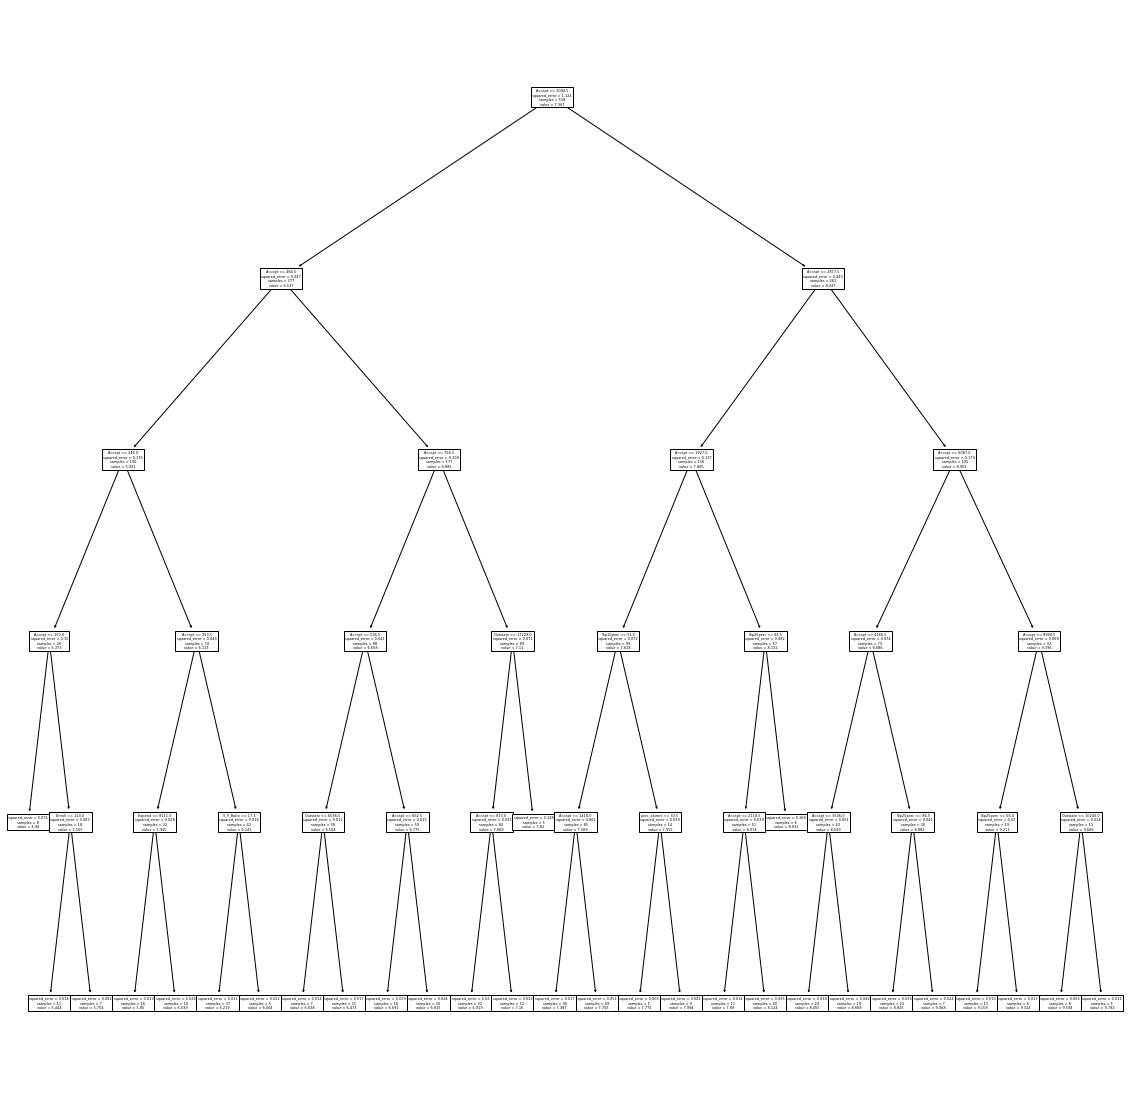

In [ ]:
#Plot the Tree
from sklearn.tree import plot_tree
fig = plt.figure(figsize = (20, 20))
plot_tree(tree_res, feature_names = X_train.iloc[:, 1:].columns)

In [ ]:
pred_tree = tree_res.predict(X_test.iloc[:, 1:])
pred_tree = np.exp(pred_tree)
pred_tree

array([  763.34012776,  3375.17183132,  3375.17183132,   647.64670575,
         911.00608547,  4700.70011616,  2213.94915477,  2213.94915477,
         347.39930172,  2213.94915477,   763.34012776,  1010.99193944,
         647.64670575,  2669.33958598,   502.4106309 ,  5812.96982257,
         911.00608547,   347.39930172,  4700.70011616,  2213.94915477,
        1286.51634283,  1010.99193944,  6802.69399089,  2213.94915477,
        1614.35881239,  3375.17183132,  2964.31932027,  2213.94915477,
         763.34012776,  1614.35881239,  2964.31932027,   647.64670575,
        3375.17183132,  6802.69399089,   502.4106309 ,  1614.35881239,
         347.39930172,   139.81628255,  2213.94915477,  4700.70011616,
        3375.17183132,   647.64670575,   647.64670575,   647.64670575,
        2213.94915477,  2213.94915477,  5601.16769401,  2964.31932027,
         805.32374275,   911.00608547,   647.64670575,  2213.94915477,
         647.64670575,   604.55708138,  3375.17183132,   502.4106309 ,
      

In [ ]:
abs_err_tree = abs(y_test - pred_tree)

In [ ]:
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_tree.mean(),
                                             'Median of AbsErrors' : abs_err_tree.median(),
                                             'SD of AbsErrors' :     abs_err_tree.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_tree),
                                             'Min of AbsErrors':     abs_err_tree.min(),
                                             'Max of AbsErrors':     abs_err_tree.max()}, index = ['Decision Tree Reg']),
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,537.817124,317.033665,871.439060,387.212348,2.040577,7451.405327
Ridge Reg,2537.451016,448.365557,16719.536998,981.719355,5.728062,243358.851230
Lasso Reg,2879.191449,443.375211,21461.190113,1005.924405,2.327060,319586.567504
Decision Tree Reg,567.837692,173.676257,1043.219354,567.777323,0.524456,7174.016627


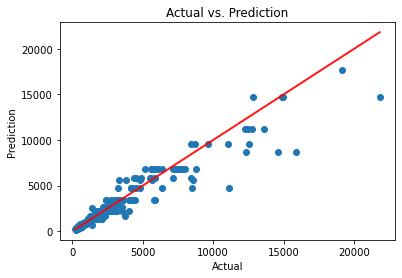

In [ ]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_tree)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

## Model 5: Bagging

### Model 5: Prediction on Test Dataset

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#Bagging: Using All Features
bagging_reg = RandomForestRegressor(max_features = 17, random_state = 123, n_estimators = 500)
bagging_res = bagging_reg.fit(X_train.iloc[:, 1:], logy_train)
pred_bagging = bagging_res.predict(X_test.iloc[:, 1:])
pred_bagging = np.exp(pred_bagging)
pred_bagging

array([  664.28155456,  3415.90320752,  3569.18078303,   655.94043671,
         926.66980918,  4731.60512778,  2063.01334049,  2437.96631485,
         453.54088529,  2568.49658899,   703.85667912,  1007.78673967,
         614.16572129,  2880.09790153,   512.79689451,  5266.8277436 ,
         888.55295263,   337.56873477,  5611.5420972 ,  2147.93408211,
        1314.40078597,  1009.6113305 ,  7333.22878643,  2214.32208227,
        1906.7109032 ,  3819.88449385,  2689.14034264,  2396.71845871,
         738.24095651,  1565.18745015,  2883.05756622,   678.33077254,
        3168.99624565,  8698.99424795,   513.94854606,  1769.90624971,
         327.80175142,   171.33984751,  1959.39144388,  5393.99734397,
        2908.26637882,   735.0462562 ,   616.90099797,   673.39820027,
        2355.94531738,  2135.58380763,  4201.98104332,  2996.25674522,
         774.20417008,  1026.99469246,   651.81673937,  2227.86432374,
         700.87141051,   431.39862717,  3379.90882898,   527.91906447,
      

In [ ]:
#K-Fold Cross Validation for Choosing Hyper-parameters
#Create Hyper-parameters grid
max_depth = [5, 7, 10]
n_estimators=[100,500,1000]
grid = list(itertools.product(max_depth,n_estimators))
grid = pd.DataFrame(data = grid, index = range(1, 10), columns = ['max_depth', 'n_estimators'])
grid

,max_depth,n_estimators
1,5,100
2,5,500
3,5,1000
4,7,100
5,7,500
6,7,1000
7,10,100
8,10,500
9,10,1000


In [ ]:
k = 10
cv_errors = pd.DataFrame(index = range(1, k + 1), columns = range(1, 10))
cv_errors

,1,2,3,4,5,6,7,8,9
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
folds

array([ 7,  4,  8,  3,  9, 10,  6,  6,  2,  4,  7,  6,  6,  2,  1,  1,  8,
        8,  9,  5,  6,  7, 10,  9,  5,  7,  1,  6,  4,  8,  5,  1,  3,  3,
        1,  7,  5,  7,  9,  5,  5,  3,  7,  5, 10,  7,  6,  9, 10,  5,  1,
        3,  4,  7,  5,  5,  1,  9,  4,  6,  1,  9,  1,  1, 10,  1,  5,  2,
       10,  3,  5,  6,  6,  8,  4,  6, 10,  1,  9, 10,  9,  2,  9,  1,  6,
        9, 10,  9, 10,  4,  7, 10,  9,  4,  6,  1,  9,  3,  3,  2,  7,  4,
       10,  6,  9,  4,  8,  2,  4,  2,  3, 10,  9,  3,  3,  6,  3,  1,  3,
        8,  9,  6,  5,  6,  1,  8,  2,  9,  4,  8,  4,  7,  9,  3, 10,  6,
        5,  7,  1,  6,  8,  6,  3,  4,  1,  4,  8, 10,  9,  4, 10,  4,  2,
        9,  3, 10,  5,  6,  1,  2,  4,  6,  5,  7,  8,  5, 10,  8,  7,  9,
       10,  3,  3,  6,  9,  1,  7,  7,  5,  8,  5,  7,  6, 10,  1, 10,  7,
        8, 10,  5,  5,  2, 10,  7,  3, 10,  2,  9,  5,  8,  6,  3,  8,  6,
        7,  8,  3,  7,  4,  4,  9,  6,  9,  4,  4,  2, 10,  8,  6,  1,  5,
       10, 10,  2, 10,  9

In [ ]:
for i in range(1, grid.shape[0] + 1):
    for j in range(1, k + 1):
        bagg_regressor = RandomForestRegressor(max_depth = grid.loc[i, 'max_depth'],
                                         n_estimators = grid.loc[i, 'n_estimators'])
        bagging_res = bagg_regressor.fit(X_train.iloc[folds != j, 1:], logy_train[folds != j])
        pred = bagging_res.predict(X_train.iloc[folds == j, 1:])
        cv_errors.iloc[j - 1, i - 1] = ((logy_train[folds == j] - pred) ** 2).mean()



In [ ]:
cv_errors

,1,2,3,4,5,6,7,8,9
1,0.03277,0.03061,0.031406,0.029627,0.029668,0.030119,0.030559,0.030144,0.029739
2,0.026264,0.024668,0.024157,0.02268,0.022123,0.02202,0.022018,0.021743,0.021508
3,0.029985,0.029301,0.029605,0.027949,0.028703,0.029314,0.028546,0.028343,0.028896
4,0.059689,0.058566,0.058147,0.059686,0.055986,0.056456,0.05815,0.056621,0.05559
5,0.06632,0.066405,0.065697,0.062246,0.062095,0.062084,0.063805,0.061353,0.061311
6,0.033727,0.034707,0.034985,0.033775,0.033031,0.031748,0.035108,0.031806,0.031804
7,0.037474,0.036268,0.036119,0.036492,0.035688,0.035865,0.035636,0.035739,0.035858
8,0.030704,0.030127,0.03001,0.029055,0.028627,0.028433,0.02641,0.027547,0.028853
9,0.041055,0.038818,0.038593,0.039354,0.036738,0.037915,0.037796,0.037832,0.03649
10,0.036057,0.035296,0.035103,0.031494,0.031548,0.031511,0.032004,0.031123,0.030353


In [ ]:
cv_errors.mean(axis = 0)


1    0.039404
2    0.038477
3    0.038382
4    0.037236
5    0.036421
6    0.036546
7    0.037003
8    0.036225
9    0.036040
dtype: float64

In [ ]:
cv_errors.mean(axis = 0).argmin() + 1


9

In [ ]:
#Best Model
grid.loc[cv_errors.mean(axis = 0).argmin() + 1,:]

max_depth         10
n_estimators    1000
Name: 9, dtype: int64

In [ ]:
#Bagging: Best model
bagging_reg = RandomForestRegressor(max_depth = 10, random_state = 123, n_estimators = 1000)
bagging_res = bagging_reg.fit(X_train.iloc[:, 1:], logy_train)
pred_bagging = bagging_res.predict(X_test.iloc[:, 1:])
pred_bagging = np.exp(pred_bagging)
pred_bagging

array([  663.1578023 ,  3443.65769752,  3559.93292589,   663.10109819,
         922.97579627,  4779.12863935,  2059.29080252,  2410.52053717,
         455.82966454,  2565.11930524,   708.16137575,  1011.37469707,
         614.72583449,  2835.61548889,   512.46369511,  5243.65036889,
         890.39195768,   338.84783056,  5643.07580073,  2143.15247361,
        1317.14795987,   998.39264511,  7286.33908604,  2218.09655906,
        1926.97636494,  3798.94915078,  2720.8259669 ,  2378.81820168,
         747.15100533,  1575.35892349,  2874.28107733,   674.264726  ,
        3191.32383605,  8695.64725309,   512.89793337,  1778.43869451,
         329.69708936,   172.04934861,  1945.34735319,  5433.16182254,
        2927.26874854,   738.82579205,   619.86316996,   672.33950095,
        2342.14586274,  2148.24510055,  4143.94360303,  3049.06891431,
         769.46796436,  1029.75747873,   654.07386833,  2199.271195  ,
         705.23422922,   431.63671654,  3422.89526101,   525.98746223,
      

In [ ]:
abs_err_bagging = abs(y_test - pred_bagging)

In [ ]:
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_bagging.mean(),
                                             'Median of AbsErrors' : abs_err_bagging.median(),
                                             'SD of AbsErrors' :     abs_err_bagging.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_bagging),
                                             'Min of AbsErrors':     abs_err_bagging.min(),
                                             'Max of AbsErrors':     abs_err_bagging.max()}, index = ['Bagging Reg']),
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,537.817124,317.033665,871.439060,387.212348,2.040577,7451.405327
Ridge Reg,2537.451016,448.365557,16719.536998,981.719355,5.728062,243358.851230
Lasso Reg,2879.191449,443.375211,21461.190113,1005.924405,2.327060,319586.567504
Decision Tree Reg,567.837692,173.676257,1043.219354,567.777323,0.524456,7174.016627
Bagging Reg,500.213920,163.872343,958.317222,478.462675,0.101098,6357.009411


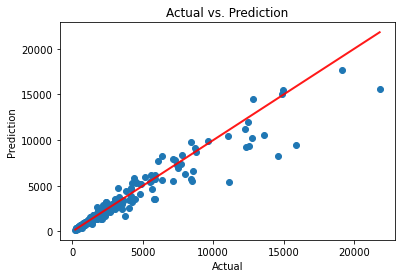

In [ ]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_bagging)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

## Model 6: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#Random Forest: Using 5 Features
rf_reg = RandomForestRegressor(max_features = 5, random_state = 123, n_estimators = 500)
rf_res = rf_reg.fit(X_train.iloc[:, 1:], logy_train)

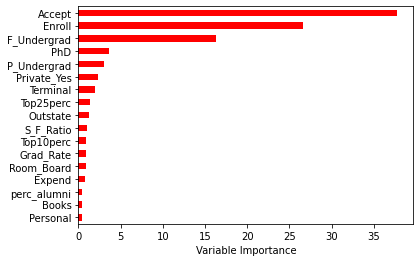

In [ ]:
Importance = pd.DataFrame({'Importance':rf_res.feature_importances_ * 100},
                          index = X_train.iloc[:, 1:].columns)
Importance.sort_values(by = 'Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [ ]:
#K-Fold Cross Validation for Choosing Hyper-parameters
#Create Hyper-parameters grid
max_depth = [5, 7, 10]
max_features=[5,8,10,12]
n_estimators=[100,500,1000]
grid = list(itertools.product(max_depth,max_features,n_estimators))
grid = pd.DataFrame(data = grid, index = range(1, 37), columns = ['max_depth','max_features', 'n_estimators'])
grid

,max_depth,max_features,n_estimators
1,5,5,100
2,5,5,500
3,5,5,1000
4,5,8,100
5,5,8,500
6,5,8,1000
7,5,10,100
8,5,10,500
9,5,10,1000
10,5,12,100


In [ ]:
k = 10
cv_errors = pd.DataFrame(index = range(1, k + 1), columns = range(1, 37))
cv_errors

,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
folds

array([ 7,  4,  8,  3,  9, 10,  6,  6,  2,  4,  7,  6,  6,  2,  1,  1,  8,
        8,  9,  5,  6,  7, 10,  9,  5,  7,  1,  6,  4,  8,  5,  1,  3,  3,
        1,  7,  5,  7,  9,  5,  5,  3,  7,  5, 10,  7,  6,  9, 10,  5,  1,
        3,  4,  7,  5,  5,  1,  9,  4,  6,  1,  9,  1,  1, 10,  1,  5,  2,
       10,  3,  5,  6,  6,  8,  4,  6, 10,  1,  9, 10,  9,  2,  9,  1,  6,
        9, 10,  9, 10,  4,  7, 10,  9,  4,  6,  1,  9,  3,  3,  2,  7,  4,
       10,  6,  9,  4,  8,  2,  4,  2,  3, 10,  9,  3,  3,  6,  3,  1,  3,
        8,  9,  6,  5,  6,  1,  8,  2,  9,  4,  8,  4,  7,  9,  3, 10,  6,
        5,  7,  1,  6,  8,  6,  3,  4,  1,  4,  8, 10,  9,  4, 10,  4,  2,
        9,  3, 10,  5,  6,  1,  2,  4,  6,  5,  7,  8,  5, 10,  8,  7,  9,
       10,  3,  3,  6,  9,  1,  7,  7,  5,  8,  5,  7,  6, 10,  1, 10,  7,
        8, 10,  5,  5,  2, 10,  7,  3, 10,  2,  9,  5,  8,  6,  3,  8,  6,
        7,  8,  3,  7,  4,  4,  9,  6,  9,  4,  4,  2, 10,  8,  6,  1,  5,
       10, 10,  2, 10,  9

In [ ]:
for i in range(1, grid.shape[0] + 1):
    for j in range(1, k + 1):
        rand_regressor = RandomForestRegressor(max_depth = grid.loc[i, 'max_depth'],
                                               max_features=grid.loc[i, 'max_features'],
                                               n_estimators = grid.loc[i, 'n_estimators'])
        rand_res = rand_regressor.fit(X_train.iloc[folds != j, 1:], logy_train[folds != j])
        pred = rand_res.predict(X_train.iloc[folds == j, 1:])
        cv_errors.iloc[j - 1, i - 1] = ((logy_train[folds == j] - pred) ** 2).mean()



In [ ]:
cv_errors


,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
1,0.05111,0.052818,0.05363,0.040319,0.039383,0.038818,0.037575,0.033831,0.034695,0.032102,...,0.042793,0.035625,0.03382,0.03475,0.032021,0.030615,0.031803,0.031732,0.030217,0.029633
2,0.063194,0.059516,0.058423,0.034833,0.033163,0.034049,0.025842,0.027685,0.026814,0.024534,...,0.039218,0.026555,0.024389,0.025114,0.021827,0.020525,0.020663,0.020134,0.02041,0.019636
3,0.042158,0.040527,0.03962,0.032322,0.03012,0.030338,0.027814,0.029378,0.029479,0.02957,...,0.02955,0.029164,0.026209,0.02663,0.025663,0.026922,0.02708,0.027022,0.026664,0.027203
4,0.080929,0.078202,0.07906,0.064678,0.064403,0.065553,0.061322,0.060763,0.061295,0.059946,...,0.066033,0.060301,0.056466,0.057085,0.056222,0.056075,0.056401,0.053819,0.055727,0.055613
5,0.086289,0.082546,0.082366,0.070233,0.068192,0.070564,0.070484,0.066169,0.067345,0.065544,...,0.066207,0.063594,0.062144,0.06125,0.061517,0.062632,0.060279,0.060224,0.06091,0.060067
6,0.039245,0.045769,0.043401,0.033285,0.034344,0.033682,0.032896,0.032471,0.032964,0.034771,...,0.03179,0.031159,0.027907,0.029149,0.0307,0.029114,0.029097,0.030145,0.029423,0.029464
7,0.063635,0.06861,0.073125,0.043274,0.044103,0.042362,0.037739,0.037223,0.037157,0.033781,...,0.055556,0.038156,0.036702,0.03667,0.036946,0.034668,0.033254,0.034096,0.031697,0.03336
8,0.046383,0.047686,0.046148,0.034947,0.034734,0.035491,0.03258,0.031168,0.031837,0.029471,...,0.036357,0.03058,0.029956,0.030177,0.028502,0.029091,0.02825,0.027329,0.027624,0.028713
9,0.066808,0.071109,0.068553,0.052866,0.052929,0.052878,0.051659,0.046452,0.0478,0.046851,...,0.05007,0.043812,0.043738,0.042995,0.043819,0.041516,0.041393,0.040383,0.037633,0.039048
10,0.056135,0.054078,0.05578,0.043213,0.042669,0.043451,0.041059,0.03959,0.038595,0.037733,...,0.040347,0.034164,0.034376,0.034172,0.032247,0.032084,0.032637,0.034141,0.032437,0.03132


In [ ]:
cv_errors.mean(axis = 0)


1     0.059589
2     0.060086
3     0.060011
4     0.044997
5     0.044404
6     0.044719
7     0.041897
8     0.040473
9     0.040798
10    0.039430
11    0.038838
12    0.038687
13    0.050839
14    0.049465
15    0.048960
16    0.039517
17    0.038459
18    0.038672
19    0.036949
20    0.036604
21    0.036462
22    0.036995
23    0.035721
24    0.035919
25    0.047063
26    0.045817
27    0.045792
28    0.039311
29    0.037571
30    0.037799
31    0.036946
32    0.036324
33    0.036086
34    0.035903
35    0.035274
36    0.035406
dtype: float64

In [ ]:
cv_errors.mean(axis = 0).argmin() + 1


35

In [ ]:
#Best Model
grid.loc[cv_errors.mean(axis = 0).argmin() + 1,:]

max_depth        10
max_features     12
n_estimators    500
Name: 35, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#Random Forest:beseatures
rf_reg = RandomForestRegressor(max_features = 12,max_depth=10, random_state = 123, n_estimators = 500)
rf_res = rf_reg.fit(X_train.iloc[:, 1:], logy_train)

### Model 6: Prediction on Test Dataset

In [ ]:
pred_rf = rf_reg.predict(X_test.iloc[:, 1:])
pred_rf = np.exp(pred_rf)
pred_rf

array([  662.97797591,  3232.19923127,  3473.11209011,   667.92830509,
         913.47888695,  4801.00110001,  2022.40903799,  2423.28732965,
         494.52834637,  2504.90011731,   703.76000026,  1025.13929388,
         612.89543956,  2816.35714093,   512.78706034,  5048.02704913,
         899.61410702,   341.89388435,  5658.39936123,  2150.61313856,
        1318.28836947,  1012.85938558,  7068.50134164,  2224.70736561,
        1922.13541521,  3623.11698713,  2650.22088852,  2472.98210122,
         711.69942716,  1587.88010115,  2853.57435523,   656.88284618,
        3247.15799534,  8447.3176981 ,   522.51883416,  1745.55522207,
         321.58334482,   169.53029449,  1983.40544522,  5973.65123234,
        2817.94284415,   784.44645797,   637.53905611,   679.77020259,
        2357.98058216,  2086.62881231,  3960.94688888,  2928.44506656,
         766.49540382,  1042.70012205,   636.37917011,  2120.14789131,
         700.37840999,   437.27945209,  3288.31220747,   525.50120728,
      

In [ ]:
abs_err_rf = abs(y_test - pred_rf)

In [ ]:
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_rf.mean(),
                                             'Median of AbsErrors' : abs_err_rf.median(),
                                             'SD of AbsErrors' :     abs_err_rf.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_rf),
                                             'Min of AbsErrors':     abs_err_rf.min(),
                                             'Max of AbsErrors':     abs_err_rf.max()}, index = ['Random Forest Reg']),
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,537.817124,317.033665,871.439060,387.212348,2.040577,7451.405327
Ridge Reg,2537.451016,448.365557,16719.536998,981.719355,5.728062,243358.851230
Lasso Reg,2879.191449,443.375211,21461.190113,1005.924405,2.327060,319586.567504
Decision Tree Reg,567.837692,173.676257,1043.219354,567.777323,0.524456,7174.016627
Bagging Reg,500.213920,163.872343,958.317222,478.462675,0.101098,6357.009411
Random Forest Reg,482.155654,143.409038,946.946495,409.965939,0.209605,6495.240082


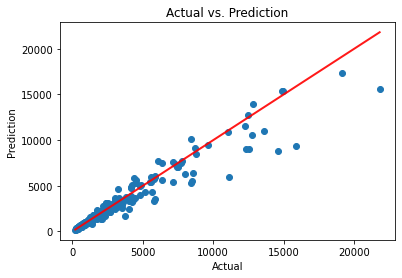

In [ ]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_rf)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

# Model 7: GB Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#Sample Boosted Model (Not Tuned)
boosting_reg = GradientBoostingRegressor(learning_rate = 0.1,  #learning rate
                                         n_estimators = 1000,  #the total number of trees to fit
                                         subsample = 1.0,      #the fraction of samples to be used,
                                                                    #if .< 1, Stochastic GB
                                         max_depth = 4,        #the maximum depth of each tree
                                         min_samples_leaf = 5, #the minimum number of observations in the leaf nodes of the trees
                                         random_state = 1234)

boosting_res = boosting_reg.fit(X_train.iloc[:, 1:], logy_train)

In [ ]:
#K-Fold Cross Validation for Choosing Hyper-parameters
#Create Hyper-parameters grid
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 0.9]
max_depth = [1, 3, 5]
grid = list(itertools.product(learning_rate, subsample, max_depth))
grid = pd.DataFrame(data = grid, index = range(1, 28), columns = ['learning_rate', 'subsample', 'max_depth'])
grid

,learning_rate,subsample,max_depth
1,0.001,0.5,1
2,0.001,0.5,3
3,0.001,0.5,5
4,0.001,0.7,1
5,0.001,0.7,3
6,0.001,0.7,5
7,0.001,0.9,1
8,0.001,0.9,3
9,0.001,0.9,5
10,0.010,0.5,1


In [ ]:
k = 10
cv_errors = pd.DataFrame(index = range(1, k + 1), columns = range(1, 28))
cv_errors

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for i in range(1, grid.shape[0] + 1):
    for j in range(1, k + 1):
        boosting_reg = GradientBoostingRegressor(learning_rate = grid.loc[i, 'learning_rate'],
                                                 subsample = grid.loc[i, 'subsample'],
                                                 max_depth = grid.loc[i, 'max_depth'],
                                                 random_state = 1234)
        boosting_res = boosting_reg.fit(X_train.iloc[folds != j, 1:], logy_train[folds != j])
        pred = boosting_res.predict(X_train.iloc[folds == j, 1:])
        cv_errors.iloc[j - 1, i - 1] = ((logy_train[folds == j] - pred) ** 2).mean()

In [ ]:
cv_errors

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
1,0.876368,0.835436,0.835168,0.876784,0.834983,0.834491,0.877187,0.836573,0.834087,0.284504,...,0.164028,0.027462,0.027404,0.026688,0.029235,0.028695,0.026022,0.029022,0.02821,0.029475
2,0.760243,0.728029,0.725969,0.760946,0.727697,0.726833,0.760896,0.728656,0.727235,0.276044,...,0.146457,0.026684,0.019241,0.020902,0.029134,0.020394,0.019856,0.027685,0.017085,0.020084
3,1.055292,0.977562,0.974242,1.055707,0.97623,0.974594,1.056782,0.976284,0.974323,0.419836,...,0.164965,0.025048,0.02358,0.028147,0.029314,0.026517,0.028668,0.026625,0.02609,0.024475
4,1.209198,1.139099,1.131407,1.210374,1.138198,1.129455,1.21028,1.140428,1.129828,0.498192,...,0.238491,0.059222,0.042427,0.046317,0.055911,0.048204,0.043638,0.058055,0.045262,0.046649
5,1.097505,1.032764,1.019989,1.097789,1.032897,1.018767,1.098744,1.032382,1.017812,0.489375,...,0.217404,0.064051,0.045115,0.056825,0.063753,0.043132,0.057305,0.064973,0.041987,0.059074
6,0.97805,0.925395,0.918492,0.977793,0.925069,0.916982,0.977841,0.925631,0.915854,0.377605,...,0.18842,0.032199,0.027627,0.03029,0.032648,0.031067,0.031074,0.035667,0.027247,0.033284
7,0.966048,0.910961,0.908316,0.966672,0.911262,0.907713,0.967531,0.910146,0.906157,0.394328,...,0.190539,0.03783,0.03495,0.036908,0.03952,0.034495,0.037701,0.041781,0.035951,0.033203
8,1.053975,0.991998,0.987211,1.054596,0.992469,0.989016,1.054335,0.992582,0.990638,0.419136,...,0.2105,0.035451,0.03358,0.038815,0.032106,0.030631,0.030478,0.033447,0.025863,0.035027
9,1.032584,0.961434,0.953855,1.034394,0.962772,0.954937,1.035791,0.963822,0.955544,0.416324,...,0.175975,0.045713,0.03996,0.034734,0.044841,0.036245,0.033405,0.041133,0.040288,0.036054
10,0.868756,0.820431,0.816771,0.868996,0.818855,0.815998,0.869599,0.817642,0.815751,0.32239,...,0.155524,0.042579,0.031366,0.032001,0.040074,0.033632,0.031801,0.040335,0.033904,0.032035


In [ ]:
cv_errors.mean(axis = 0)

1     0.989802
2     0.932311
3     0.927142
4     0.990405
5     0.932043
6     0.926879
7     0.990899
8     0.932415
9     0.926723
10    0.389774
11    0.200075
12    0.185131
13    0.393812
14    0.200812
15    0.185511
16    0.395346
17    0.201622
18    0.185230
19    0.039624
20    0.032525
21    0.035163
22    0.039654
23    0.033301
24    0.033995
25    0.039872
26    0.032189
27    0.034936
dtype: float64

In [ ]:
cv_errors.mean(axis = 0).argmin() + 1

26

In [ ]:
grid.iloc[cv_errors.mean(axis = 0).argmin() + 1, :]

learning_rate    0.1
subsample        0.9
max_depth        5.0
Name: 27, dtype: float64

# Model 7: Prediction on Test Dataset

In [ ]:
boosting_reg = GradientBoostingRegressor(learning_rate = 0.1,  #learning rate
                                         n_estimators = 1000,  #the total number of trees to fit
                                         subsample = 0.9,      #the fraction of samples to be used,
                                                                    #if .< 1, Stochastic GB
                                         max_depth = 5,        #the maximum depth of each tree
                                         min_samples_leaf = 5, #the minimum number of observations in the leaf nodes of the trees
                                         random_state = 1234)

boosting_res = boosting_reg.fit(X_train.iloc[:, 1:], logy_train)

In [ ]:
pred_boosting = boosting_res.predict(X_test.iloc[:, 1:])
pred_boosting = np.exp(pred_boosting)
pred_boosting

array([  632.7662213 ,  3367.46412627,  3381.79481417,   673.15660403,
         948.16312969,  4903.65971572,  2036.99336635,  2588.62288297,
         484.49593236,  2621.19930886,   785.10782862,   954.32360688,
         592.42367474,  2697.61241974,   479.76554359,  5382.88040232,
         851.24063434,   342.34817206,  6524.86509004,  2261.82761414,
        1300.65235349,  1029.26136637,  7432.08230943,  2150.88176896,
        1728.27714007,  3438.9976688 ,  2835.44867958,  2368.961692  ,
         774.07032036,  1574.22963092,  3250.36576616,   685.76201512,
        3631.11236463,  9627.89018479,   509.07833117,  1666.63493305,
         331.44163008,   195.81157681,  2021.10774951,  6740.1168992 ,
        2787.94579138,   720.84116979,   605.32144245,   681.13383954,
        2228.63761128,  2242.68233214,  4759.23456713,  3285.14282926,
         705.3475933 ,   987.66547032,   633.95272915,  2474.63761592,
         673.88082257,   462.29932124,  3778.82159508,   511.33979563,
      

In [ ]:
#Absolute error
abs_err_boosting = abs(y_test - pred_boosting)

In [ ]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_boosting.mean(),
                                             'Median of AbsErrors' : abs_err_boosting.median(),
                                             'SD of AbsErrors' :     abs_err_boosting.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_boosting),
                                             'Min of AbsErrors':     abs_err_boosting.min(),
                                             'Max of AbsErrors':     abs_err_boosting.max()}, index = ['GB Reg']),
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,537.817124,317.033665,871.439060,387.212348,2.040577,7451.405327
Ridge Reg,2537.451016,448.365557,16719.536998,981.719355,5.728062,243358.851230
Lasso Reg,2879.191449,443.375211,21461.190113,1005.924405,2.327060,319586.567504
Decision Tree Reg,567.837692,173.676257,1043.219354,567.777323,0.524456,7174.016627
Bagging Reg,500.213920,163.872343,958.317222,478.462675,0.101098,6357.009411
Random Forest Reg,482.155654,143.409038,946.946495,409.965939,0.209605,6495.240082
GB Reg,486.707093,155.415253,890.425561,469.571048,0.006394,6335.372089


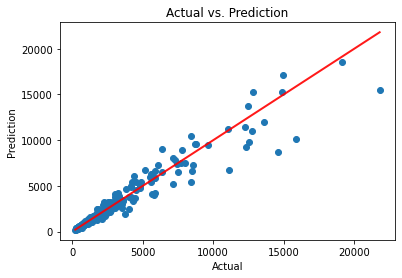

In [ ]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_boosting)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

# Model 8: XGBoost Regression

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_reg = XGBRegressor(n_estimators = 1000,
                       max_depth = 5,               #the maximum depth of each tree
                       learning_rate = 0.01,        #learning rate
                       subsample = 0.9,             #the fraction of samples to be used when constructing each tree
                       colsample_bytree = 0.3,      #subsample ratio of columns when constructing each tree
                       reg_alpha = 0.1,             #L1 (Lasso) regularization term
                       reg_lambda = 0.1,            #L2 (Ridge) regularization term
                       n_jobs = -1,                 #-1 means using all processors.
                       random_state = 1234)

xgb_res = xgb_reg.fit(X_train.iloc[:, 1:], logy_train)

In [ ]:
#K-Fold Cross Validation for Choosing Hyper-parameters
#Create Hyper-parameters grid
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 0.9]
max_depth = [2, 5, 7]
grid = list(itertools.product(learning_rate, subsample, max_depth))
grid = pd.DataFrame(data = grid, index = range(1, 28), columns = ['learning_rate', 'subsample', 'max_depth'])
grid

,learning_rate,subsample,max_depth
1,0.001,0.5,2
2,0.001,0.5,5
3,0.001,0.5,7
4,0.001,0.7,2
5,0.001,0.7,5
6,0.001,0.7,7
7,0.001,0.9,2
8,0.001,0.9,5
9,0.001,0.9,7
10,0.010,0.5,2


In [ ]:
k = 10
cv_errors = pd.DataFrame(index = range(1, k + 1), columns = range(1, 28))
cv_errors

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for i in range(1, grid.shape[0] + 1):
    for j in range(1, k + 1):
        XGboosting_reg = XGBRegressor(learning_rate = grid.loc[i, 'learning_rate'],
                                                 subsample = grid.loc[i, 'subsample'],
                                                 max_depth = grid.loc[i, 'max_depth'],
                                                 random_state = 1234)
        XGboosting_res = XGboosting_reg.fit(X_train.iloc[folds != j, 1:], logy_train[folds != j])
        pred = XGboosting_res.predict(X_train.iloc[folds == j, 1:])
        cv_errors.iloc[j - 1, i - 1] = ((logy_train[folds == j] - pred) ** 2).mean()

In [ ]:
cv_errors

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
1,40.713545,40.713545,40.713545,40.656158,40.656158,40.656158,40.634293,40.634293,40.634293,6.688404,...,6.596378,0.028973,0.029783,0.031798,0.02476,0.027294,0.02558,0.028847,0.03319,0.03308
2,36.792118,36.792118,36.792118,36.762952,36.762952,36.762952,36.76167,36.76167,36.76167,5.920691,...,5.890243,0.022708,0.019812,0.025672,0.01934,0.016666,0.022723,0.020209,0.020413,0.017538
3,41.135705,41.135705,41.135705,41.101235,41.101235,41.101235,41.064876,41.064876,41.064876,7.158872,...,6.995436,0.023417,0.022558,0.025335,0.025335,0.027247,0.024455,0.025941,0.025925,0.022228
4,42.389604,42.389604,42.389604,42.35738,42.35738,42.35738,42.30095,42.30095,42.30095,7.47974,...,7.353024,0.043927,0.043264,0.04154,0.046164,0.043688,0.045537,0.04573,0.042796,0.044081
5,39.557961,39.557961,39.557961,39.58308,39.58308,39.58308,39.596078,39.596078,39.596078,6.745588,...,6.704345,0.049688,0.050042,0.046859,0.049202,0.046302,0.049046,0.046442,0.050916,0.049801
6,42.461783,42.461783,42.461783,42.425547,42.425547,42.425547,42.410138,42.410138,42.410138,7.448007,...,7.282437,0.027236,0.025363,0.02595,0.023039,0.021585,0.021243,0.024742,0.022483,0.019422
7,38.205918,38.205918,38.205918,38.190906,38.190906,38.190906,38.192473,38.192473,38.192473,6.433124,...,6.387856,0.040401,0.032765,0.030055,0.037958,0.027413,0.027302,0.033423,0.027811,0.027537
8,38.831449,38.831449,38.831449,38.775134,38.775134,38.775134,38.724543,38.724543,38.724543,6.763943,...,6.623232,0.028183,0.025731,0.028668,0.031697,0.030314,0.030284,0.026898,0.026871,0.028966
9,38.029568,38.029568,38.029568,38.049218,38.049218,38.049218,38.04392,38.04392,38.04392,6.514506,...,6.518871,0.039298,0.039702,0.040374,0.043002,0.037158,0.040283,0.037623,0.037586,0.039507
10,38.135276,38.135276,38.135276,38.155,38.155,38.155,38.178907,38.178907,38.178907,6.334301,...,6.290631,0.03631,0.034924,0.034103,0.036167,0.034297,0.035633,0.033273,0.035267,0.034648


In [ ]:
cv_errors.mean(axis = 0)

1     39.625293
2     39.625293
3     39.625293
4     39.605661
5     39.605661
6     39.605661
7     39.590785
8     39.590785
9     39.590785
10     6.748718
11     6.747710
12     6.747710
13     6.695963
14     6.694825
15     6.694825
16     6.667256
17     6.664245
18     6.664245
19     0.034014
20     0.032394
21     0.033035
22     0.033666
23     0.031196
24     0.032209
25     0.032313
26     0.032326
27     0.031681
dtype: float64

In [ ]:
cv_errors.mean(axis = 0).argmin() + 1

23

In [ ]:
grid.iloc[cv_errors.mean(axis = 0).argmin() + 1, :]

learning_rate    0.1
subsample        0.7
max_depth        7.0
Name: 24, dtype: float64

In [ ]:
xgb_reg = XGBRegressor(n_estimators = 1000,
                       max_depth = 7,               #the maximum depth of each tree
                       learning_rate = 0.1,        #learning rate
                       subsample = 0.7,             #the fraction of samples to be used when constructing each tree
                       colsample_bytree = 0.3,      #subsample ratio of columns when constructing each tree
                       reg_alpha = 0.1,             #L1 (Lasso) regularization term
                       reg_lambda = 0.1,            #L2 (Ridge) regularization term
                       n_jobs = -1,                 #-1 means using all processors.
                       random_state = 1234)

xgb_res = xgb_reg.fit(X_train.iloc[:, 1:], logy_train)

In [ ]:
pred_xgb = xgb_res.predict(X_test.iloc[:, 1:])
pred_xgb = np.exp(pred_xgb)
pred_xgb

array([  805.2905 ,  2892.0444 ,  2800.0825 ,  1071.781  ,   900.6952 ,
        5689.3315 ,  1755.3812 ,  2977.1624 ,  1020.5007 ,  1950.4832 ,
         880.88007,  1016.5977 ,   705.43256,  2160.0898 ,   677.13385,
        4165.974  ,   763.30676,   431.2523 ,  5987.742  ,  1329.2446 ,
        1255.0864 ,  1373.8566 ,  6467.104  ,  2206.0627 ,  1997.2174 ,
        2521.3242 ,  2292.537  ,  2540.0732 ,   811.1701 ,  1975.7816 ,
        3071.2312 ,   534.6699 ,  3406.0073 ,  6858.41   ,   706.7767 ,
        1304.9974 ,   345.37546,   258.5251 ,  2221.3484 ,  7688.069  ,
        2268.308  ,  1029.0236 ,   944.99994,   765.1595 ,  2075.7607 ,
        2193.3823 ,  3873.3984 ,  3166.6833 ,   459.6159 ,  1411.4297 ,
         624.28015,  1445.0745 ,   863.0279 ,   491.67892,  3246.2217 ,
         567.3361 ,  8052.3027 ,  2943.6084 ,  2480.3123 ,  2480.8894 ,
        3399.4133 ,  4483.7607 ,  1646.6731 ,  4627.2954 ,  1495.3938 ,
        6614.9697 ,  1448.2676 ,   557.7542 ,  1035.9047 ,  4301

In [ ]:
#Absolute error
abs_err_xgb = abs(y_test - pred_xgb)

In [ ]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_xgb.mean(),
                                             'Median of AbsErrors' : abs_err_xgb.median(),
                                             'SD of AbsErrors' :     abs_err_xgb.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_xgb),
                                             'Min of AbsErrors':     abs_err_xgb.min(),
                                             'Max of AbsErrors':     abs_err_xgb.max()}, index = ['XGB Reg']),
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,537.817124,317.033665,871.439060,387.212348,2.040577,7451.405327
Ridge Reg,2537.451016,448.365557,16719.536998,981.719355,5.728062,243358.851230
Lasso Reg,2879.191449,443.375211,21461.190113,1005.924405,2.327060,319586.567504
Decision Tree Reg,567.837692,173.676257,1043.219354,567.777323,0.524456,7174.016627
Bagging Reg,500.213920,163.872343,958.317222,478.462675,0.101098,6357.009411
Random Forest Reg,482.155654,143.409038,946.946495,409.965939,0.209605,6495.240082
GB Reg,486.707093,155.415253,890.425561,469.571048,0.006394,6335.372089
XGB Reg,695.856733,286.981323,1141.139873,703.978699,0.000000,7977.603516


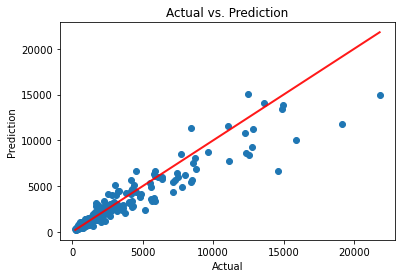

In [ ]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_xgb)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

#### ** In order to be able to use this research in the real environment, I suggest that the results of these models, especially the real-world random forest model, be used to predict the Number of applications received, or to be a predictor based on important variables and Also use the suggested variables.



# Development

#### The ultimate goal of large scale ML systems research is to understand how these principles and strategies can be made efficient, generally-applicable, and easy to program and deploy, while not forgetting that they should be supported with scientifically-validated correctness and scaling guarantees.

#### In this research, selected algorithms can be used in machine learning and deep learning for large dimensions.


#### Large sets of data are also needed to use them to learn training models. This data must be comprehensive, unbiased and of high quality. In addition, you have to wait a long time to produce new data in accordance with the desired quality.
#### It also takes time to develop algorithms to a level where they can achieve the desired goals with acceptable accuracy and appropriateness.
#### Another possible challenge is the ability to accurately interpret the results generated by the algorithm. You have to carefully choose the algorithms according to your goals.

# Conclusion

#### Based on the results, we conclude that the gradientBoost , random forest and linear regression models perform better than the other models, respectively.
#### We also found that the performance of tree models was better and that more hyperparameters could be selected with greater accuracy, and that variables Accept, Enroll, F_undergrad , PHD had a greater effect on prediction and could be used in the real world.
#### The main challenge I had in this project was dealing with out data observations as well as adapting the hyperparameters, which I tried to apply to them.

# End of the Code